In [761]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [762]:
df_train=pd.read_excel("Data_Train.xlsx",engine='openpyxl')

train_data=df_train.copy()

In [763]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [764]:
df_train.shape

(10683, 11)

In [765]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [766]:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [767]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [768]:
df_train['Arrival_hour']=pd.to_datetime(df_train['Arrival_Time']).dt.hour

In [769]:
df_train['Arrival_min']=pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [770]:
df_train["Dep_hr"]=pd.to_datetime(df_train['Dep_Time']).dt.hour

In [771]:
df_train['Dep_min']=pd.to_datetime(df_train['Dep_Time']).dt.minute

In [772]:
df_train['Journey_date']=pd.to_datetime(df_train['Date_of_Journey']).dt.day

In [773]:
df_train['Journey_month']=pd.to_datetime(df_train['Date_of_Journey']).dt.month

In [774]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_min,Dep_hr,Dep_min,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1,10,22,20,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,13,15,5,50,5,1


In [775]:
df_train['Duration_hour']=df_train['Duration'].str.split(" ").str[0].str.split("h").str[0]

In [776]:
df_train['Duration_mins']=df_train['Duration'].str.split(" ").str[1].str.split("m").str[0]

In [777]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_min,Dep_hr,Dep_min,Journey_date,Journey_month,Duration_hour,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1,10,22,20,24,3,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,13,15,5,50,5,1,7,25


In [778]:
df_train.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Route'],axis=1,inplace=True)


In [779]:
df_train.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_min,Dep_hr,Dep_min,Journey_date,Journey_month,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,1,10,22,20,24,3,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,13,15,5,50,5,1,7,25


In [780]:
df_train.drop(columns='Duration',axis=1,inplace=True)

In [781]:
df_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [782]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [783]:
df_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [784]:
df_train.drop(columns="Additional_Info",axis=1,inplace=True)

In [785]:
df_train.head(2)

,Airline,Source,Destination,Total_Stops,Price,Arrival_hour,Arrival_min,Dep_hr,Dep_min,Journey_date,Journey_month,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,1,10,22,20,24,3,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,13,15,5,50,5,1,7,25


In [786]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [787]:
df_train['Total_Stops']=df_train['Total_Stops'].replace({"non-stop":"0","1 stop":"1","2 stops":"2","3 stops":"3","4 stops":"4"})

In [788]:
df_train.head(2)

,Airline,Source,Destination,Total_Stops,Price,Arrival_hour,Arrival_min,Dep_hr,Dep_min,Journey_date,Journey_month,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,1,10,22,20,24,3,2,50
1,Air India,Kolkata,Banglore,2,7662,13,15,5,50,5,1,7,25


In [789]:
df_train['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [790]:
df_train.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         1
Price               0
Arrival_hour        0
Arrival_min         0
Dep_hr              0
Dep_min             0
Journey_date        0
Journey_month       0
Duration_hour       0
Duration_mins    1032
dtype: int64

In [791]:
df_train["Duration_mins"]=df_train["Duration_mins"].fillna(0)

In [792]:
df_train.dropna(inplace=True)

In [793]:
df_train.shape

(10682, 13)

In [794]:
Airline=df_train[["Airline"]]

Airline=pd.get_dummies(Airline,drop_first=False)

In [795]:
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [796]:
Source=df_train[['Source']]

Source=pd.get_dummies(Source,drop_first=False)

Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [797]:
Destination=df_train[['Destination']]

Destination=pd.get_dummies(Destination,drop_first=False)

In [798]:
df_train.drop(columns=["Airline","Source","Destination"],axis=1,inplace=True)

In [799]:
df_train=pd.concat([df_train,Airline,Source,Destination],axis=1)

In [800]:
df_train.head(2)

,Total_Stops,Price,Arrival_hour,Arrival_min,Dep_hr,Dep_min,Journey_date,Journey_month,Duration_hour,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,1,10,22,20,24,3,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,13,15,5,50,5,1,7,25,...,0,0,1,0,1,0,0,0,0,0


In [801]:
df_train.columns

Index(['Total_Stops', 'Price', 'Arrival_hour', 'Arrival_min', 'Dep_hr',
       'Dep_min', 'Journey_date', 'Journey_month', 'Duration_hour',
       'Duration_mins', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [802]:
df_train.shape

(10682, 33)

In [803]:
df_train.loc[df_train['Duration_hour']=='5m']

,Total_Stops,Price,Arrival_hour,Arrival_min,Dep_hr,Dep_min,Journey_date,Journey_month,Duration_hour,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6474,2,17327,16,55,16,50,3,6,5m,0,...,0,0,0,1,0,0,0,1,0,0


In [804]:
df_train.drop(index=6474,inplace=True)

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


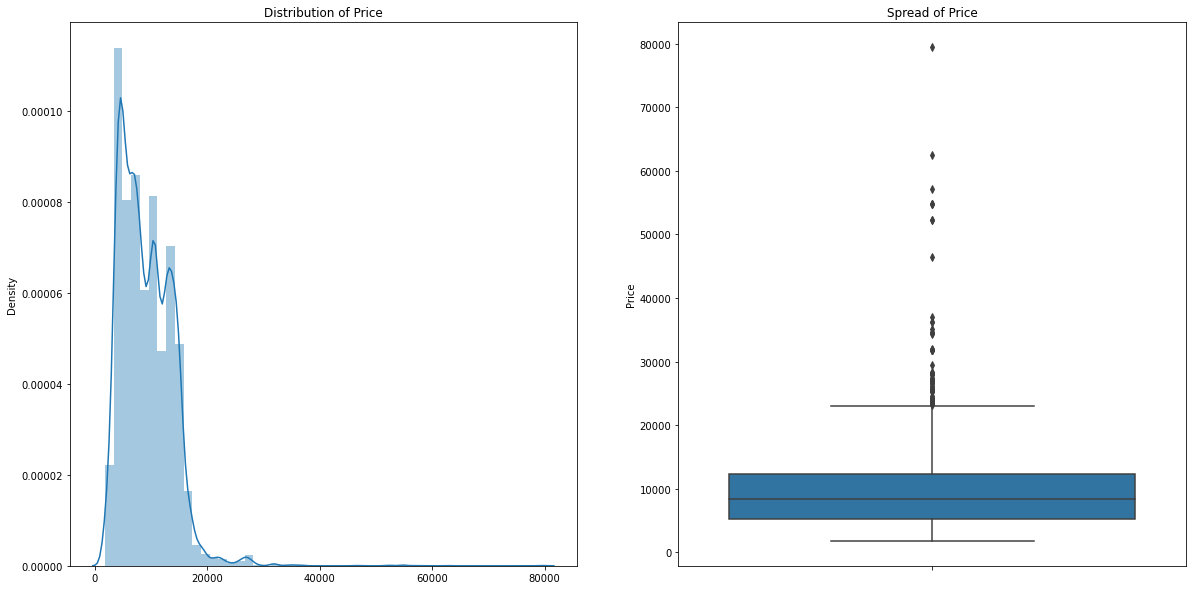

In [805]:
#Visualizing the target data:

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(x=df_train['Price'])
plt.title('Distribution of Price')

plt.subplot(1,2,2)
sns.boxplot(y=df_train['Price'])
plt.title('Spread of Price')

plt.show()

In [806]:
#Inference :Price is rightly skewed and max price is 25,000 and it is widely spread between mean and standard deviation.
df_train['Price'].describe(percentiles=[0.25,0.50,0.75,0.85,0.95,1])

count    10681.000000
mean      9086.443123
std       4611.075357
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
85%      13817.000000
95%      15764.000000
100%     79512.000000
max      79512.000000
Name: Price, dtype: float64

In [807]:
def visualize_categorical(X,Y):
    
    plt.figure(figsize=(50,30))
    
    plt.subplot(2,1,1)
    sns.countplot(train_data[X])
    plt.title("count of {}".format(X))
    
    plt.subplot(2,1,2)
    sns.boxplot(x=train_data[X],y=train_data[Y])
    plt.title("spread of {}".format(X))
    
    plt1=pd.DataFrame(train_data.groupby([X])[Y].mean().sort_values())
    plt1.plot(kind='bar',figsize=(30,30))
    plt.title("comparison of {} w.r.t {}".format(X,Y))

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


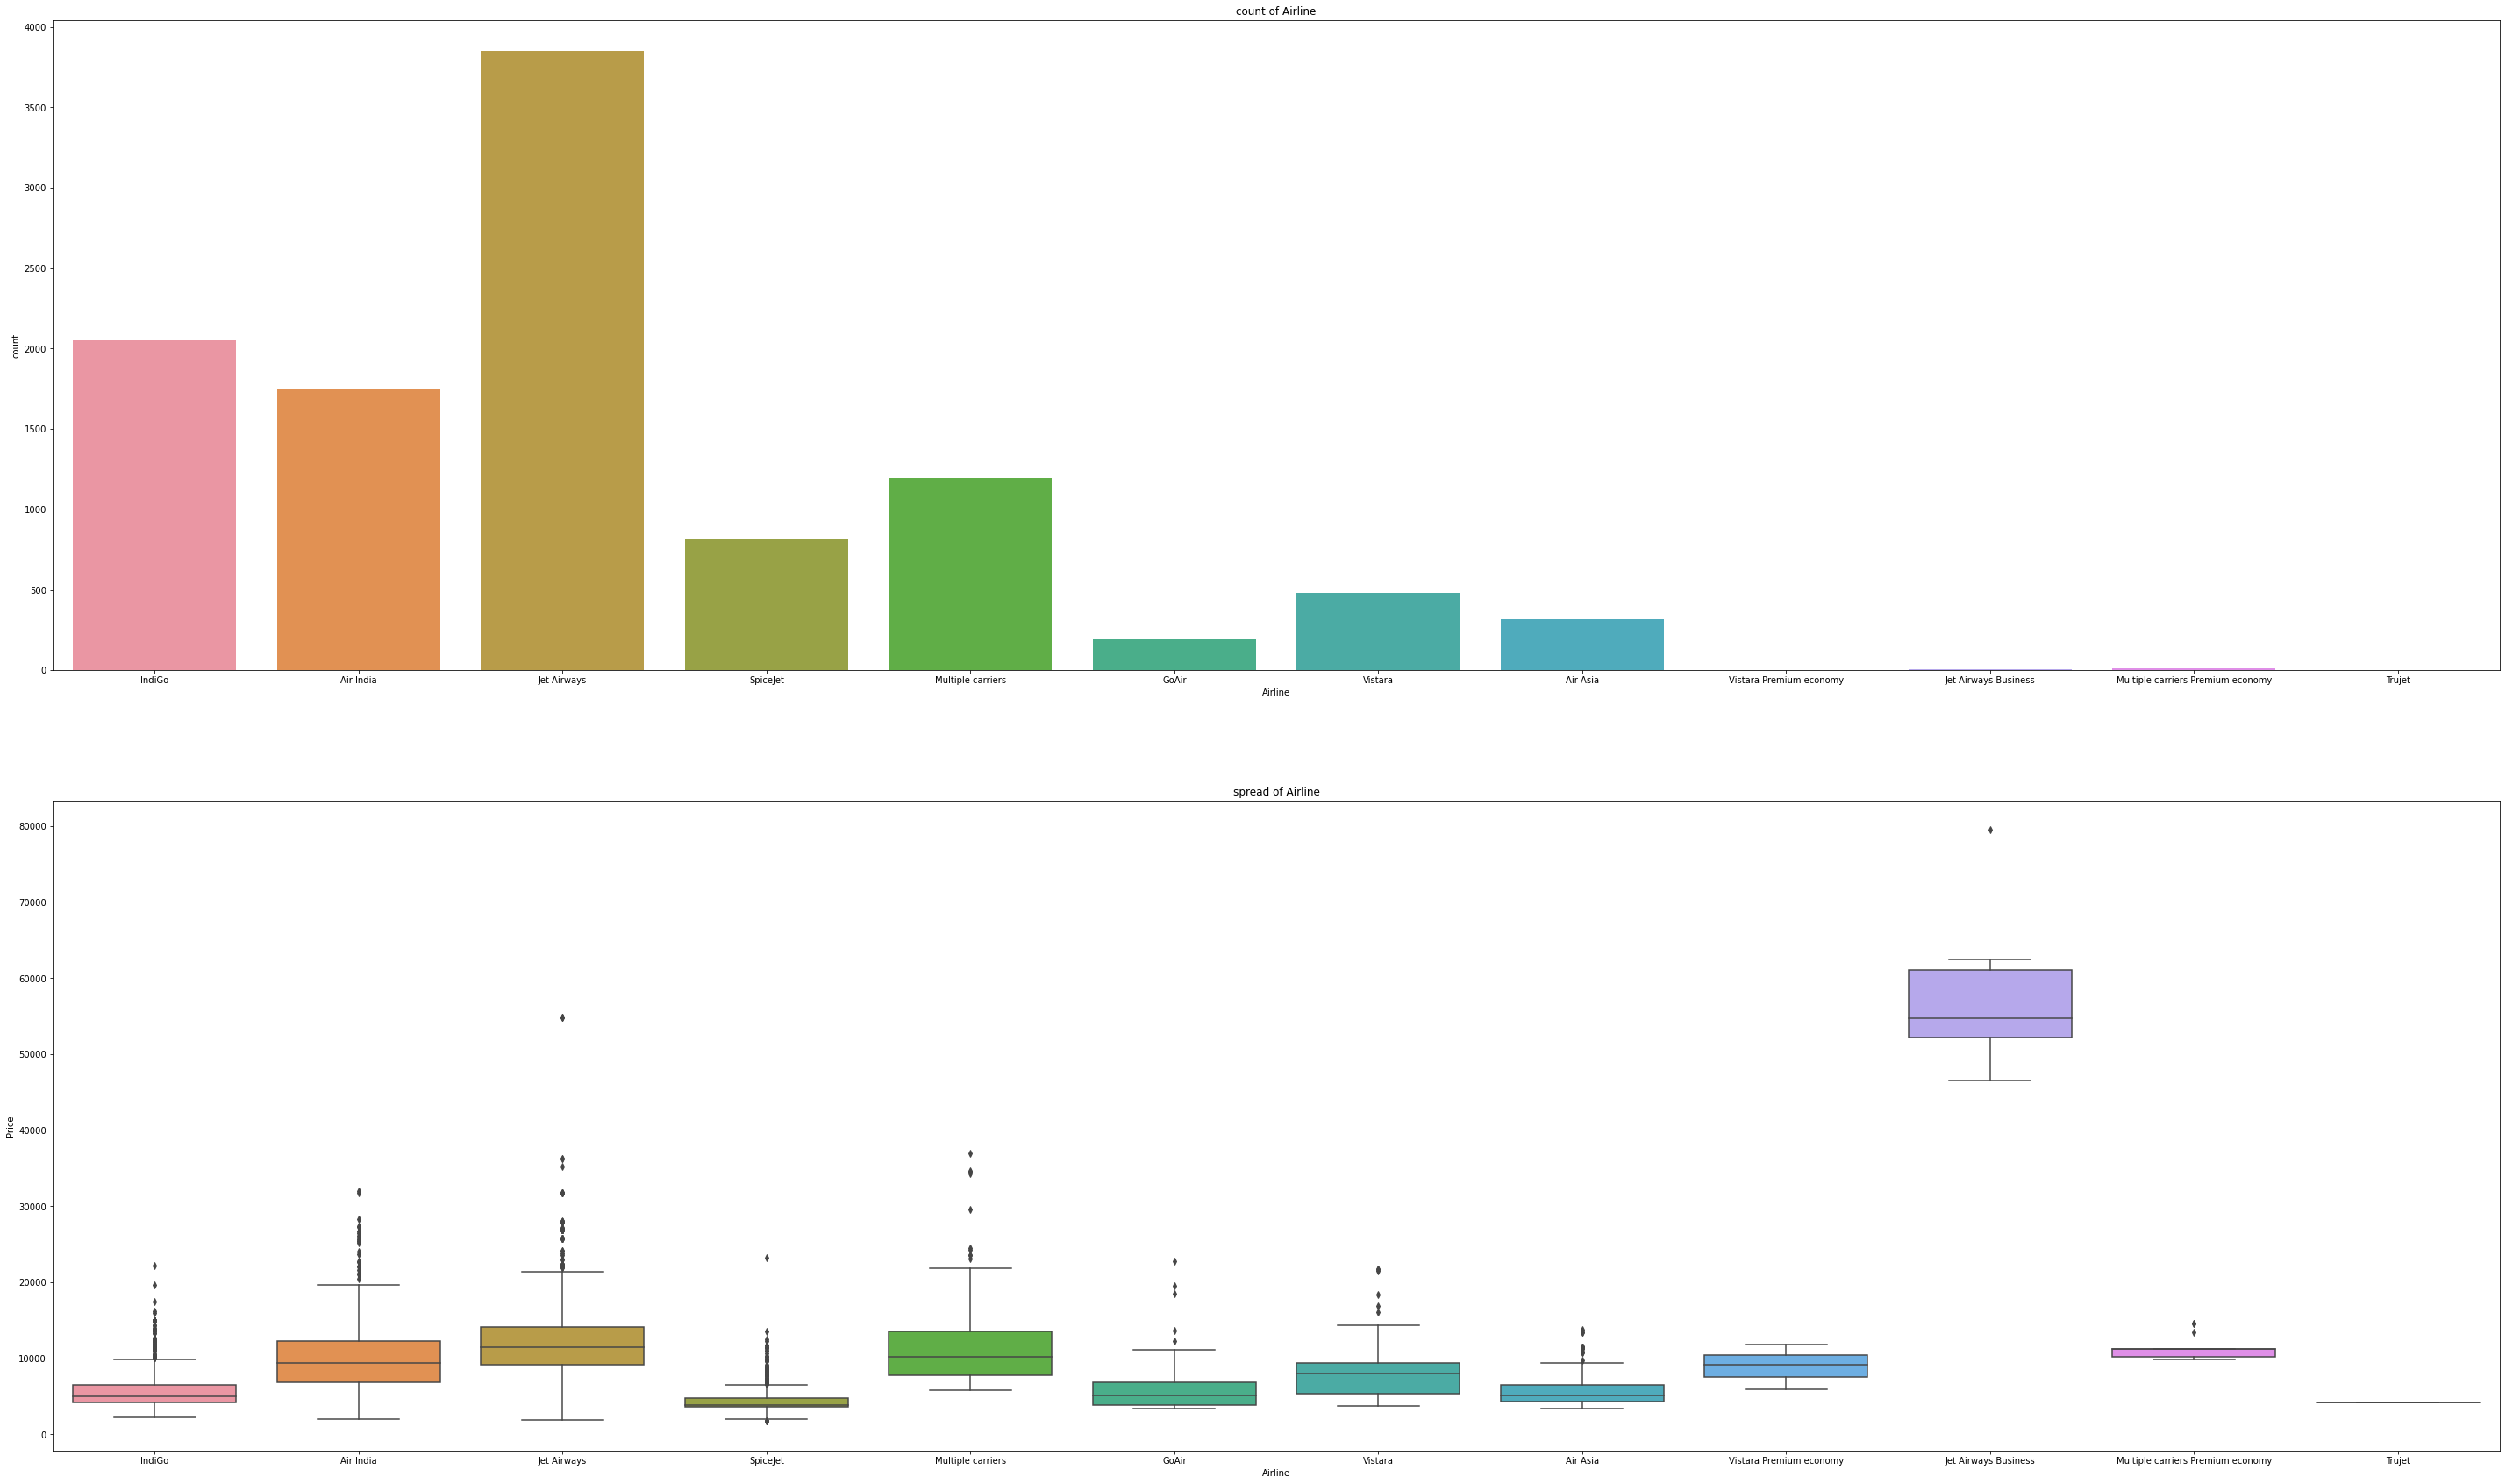

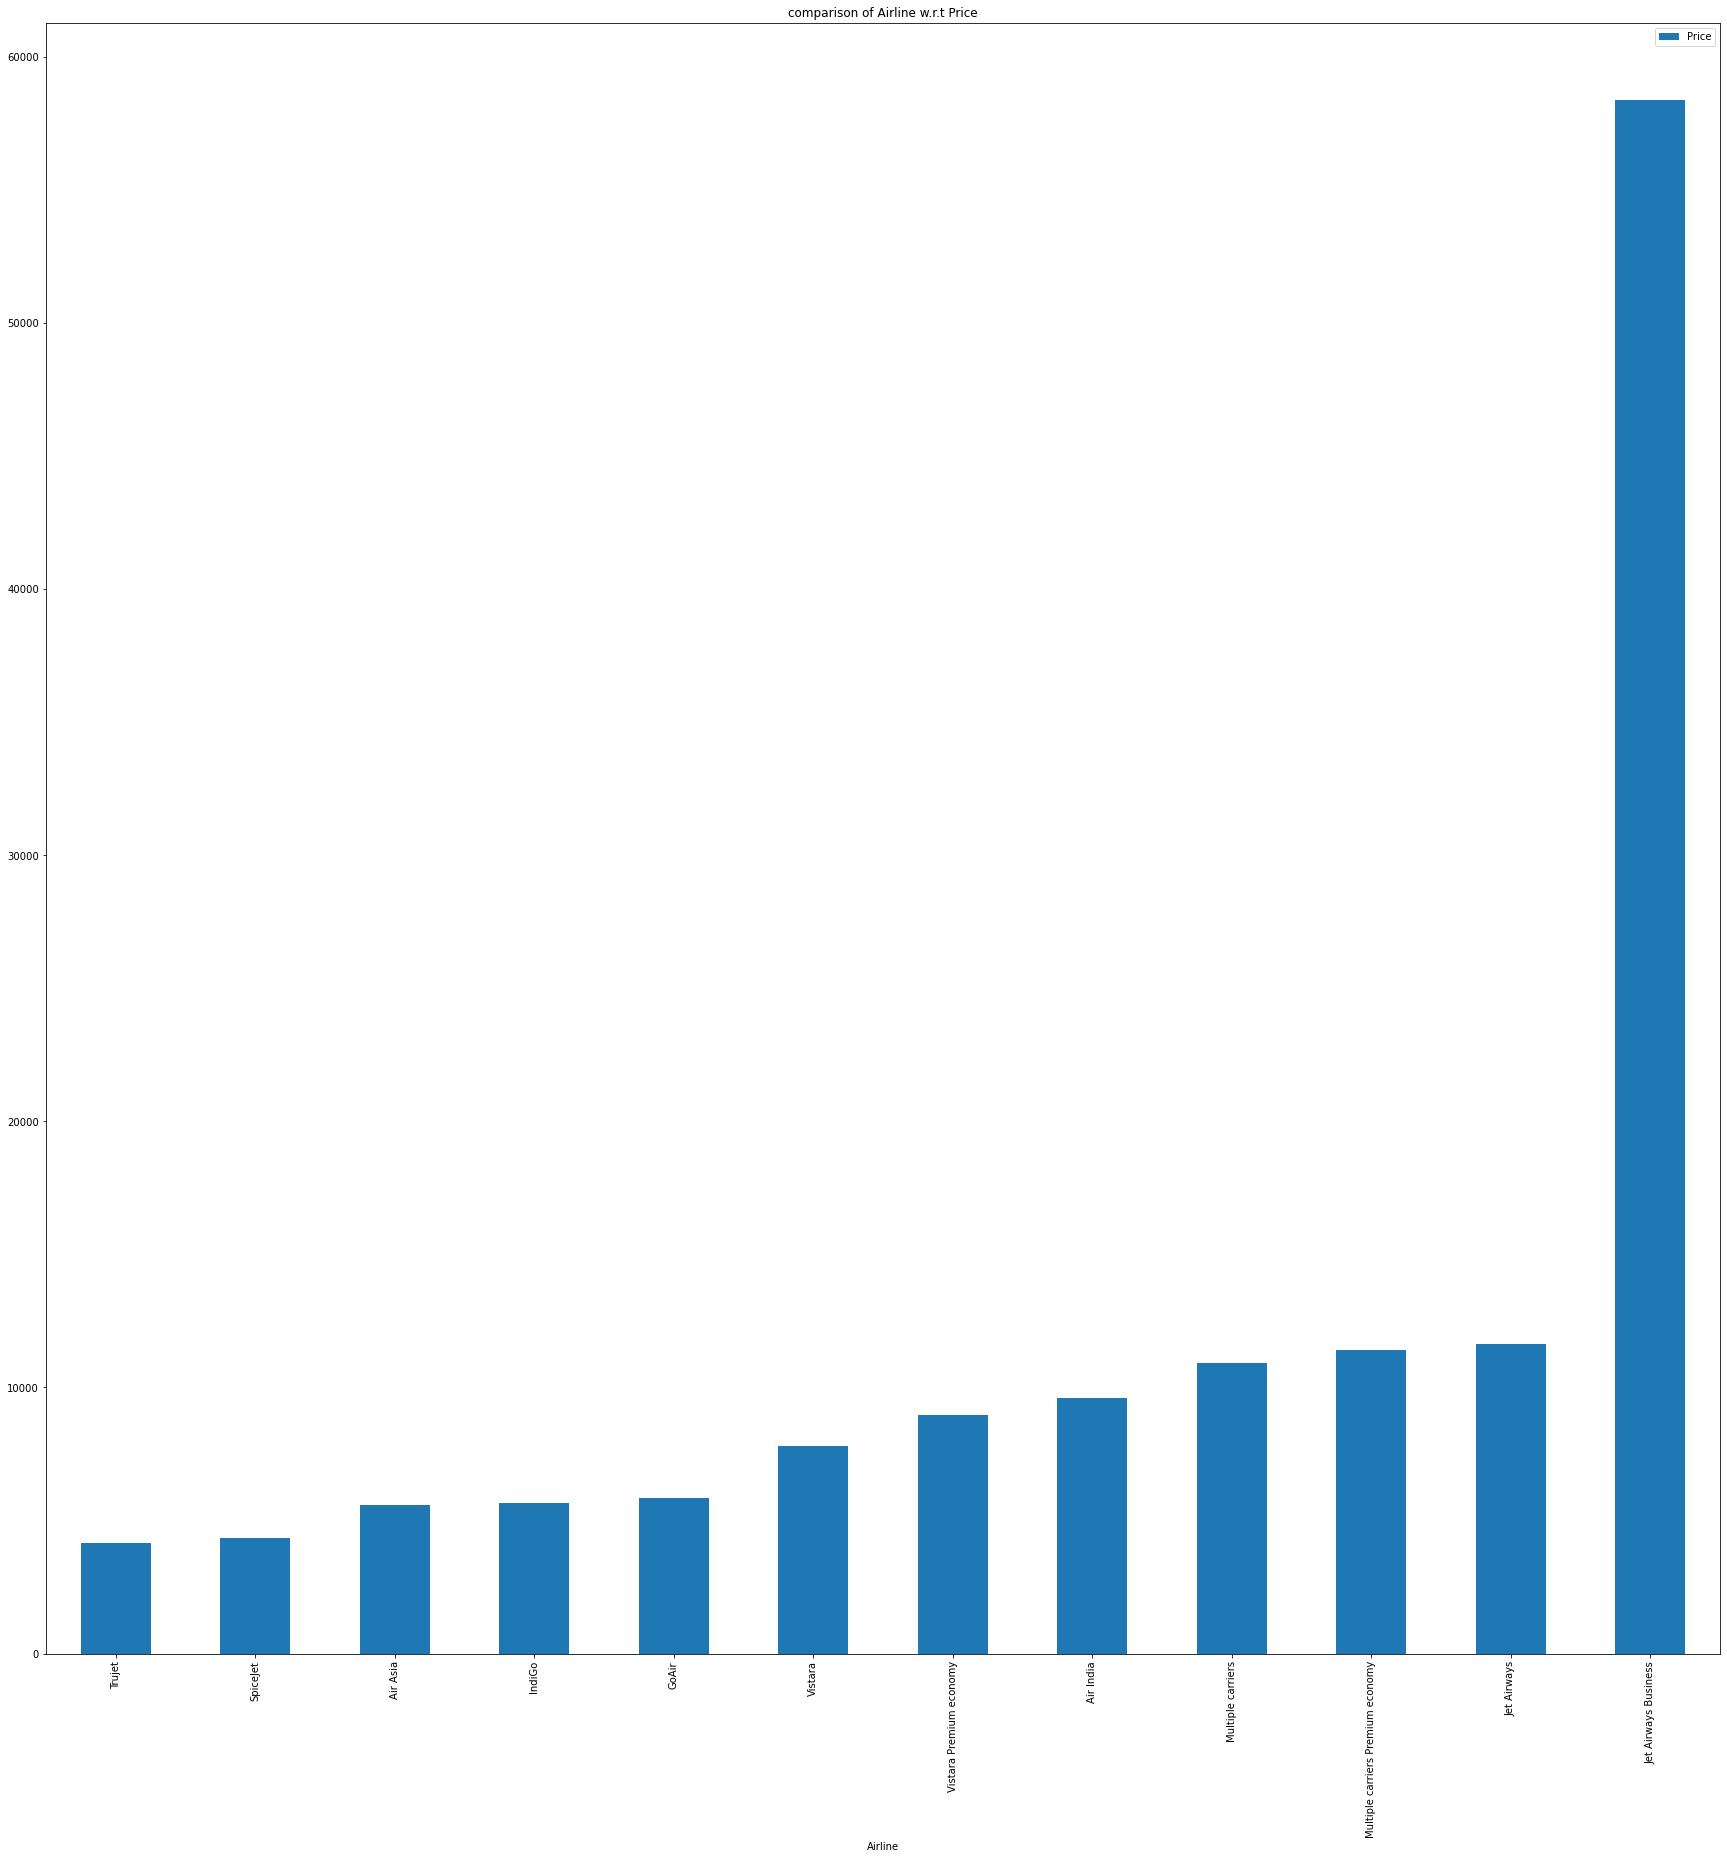

In [808]:
visualize_categorical('Airline','Price')

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


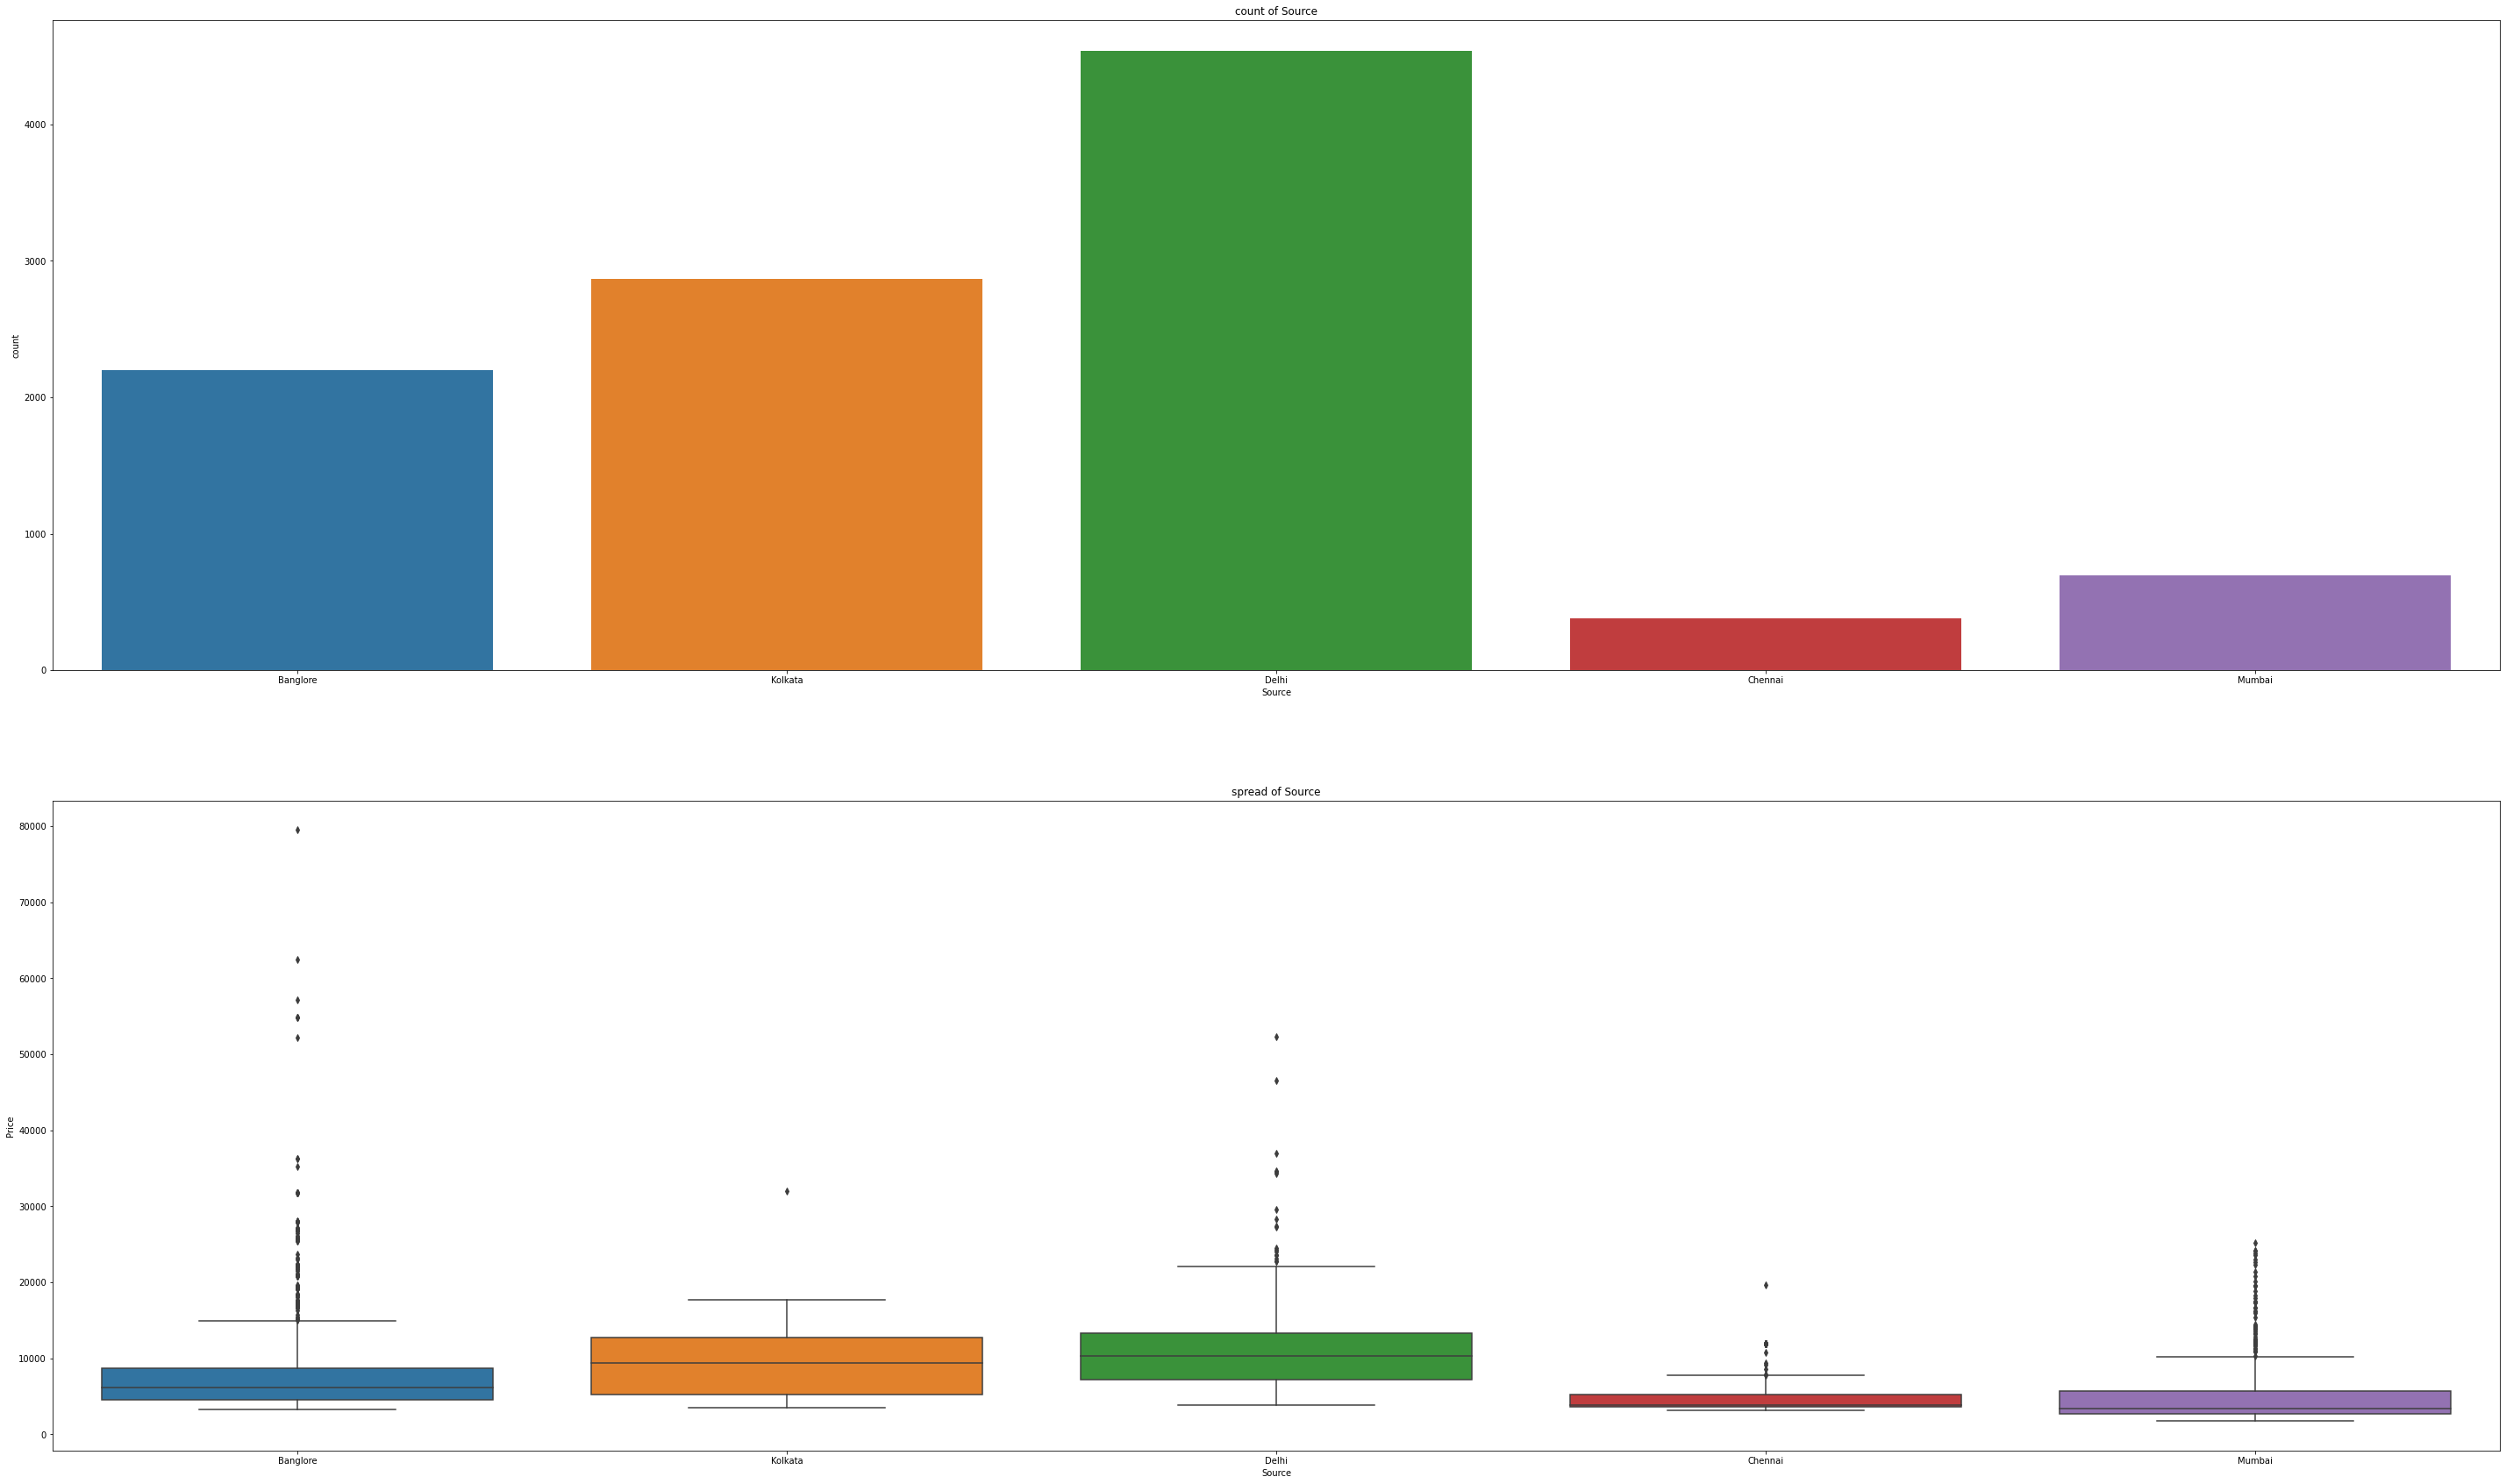

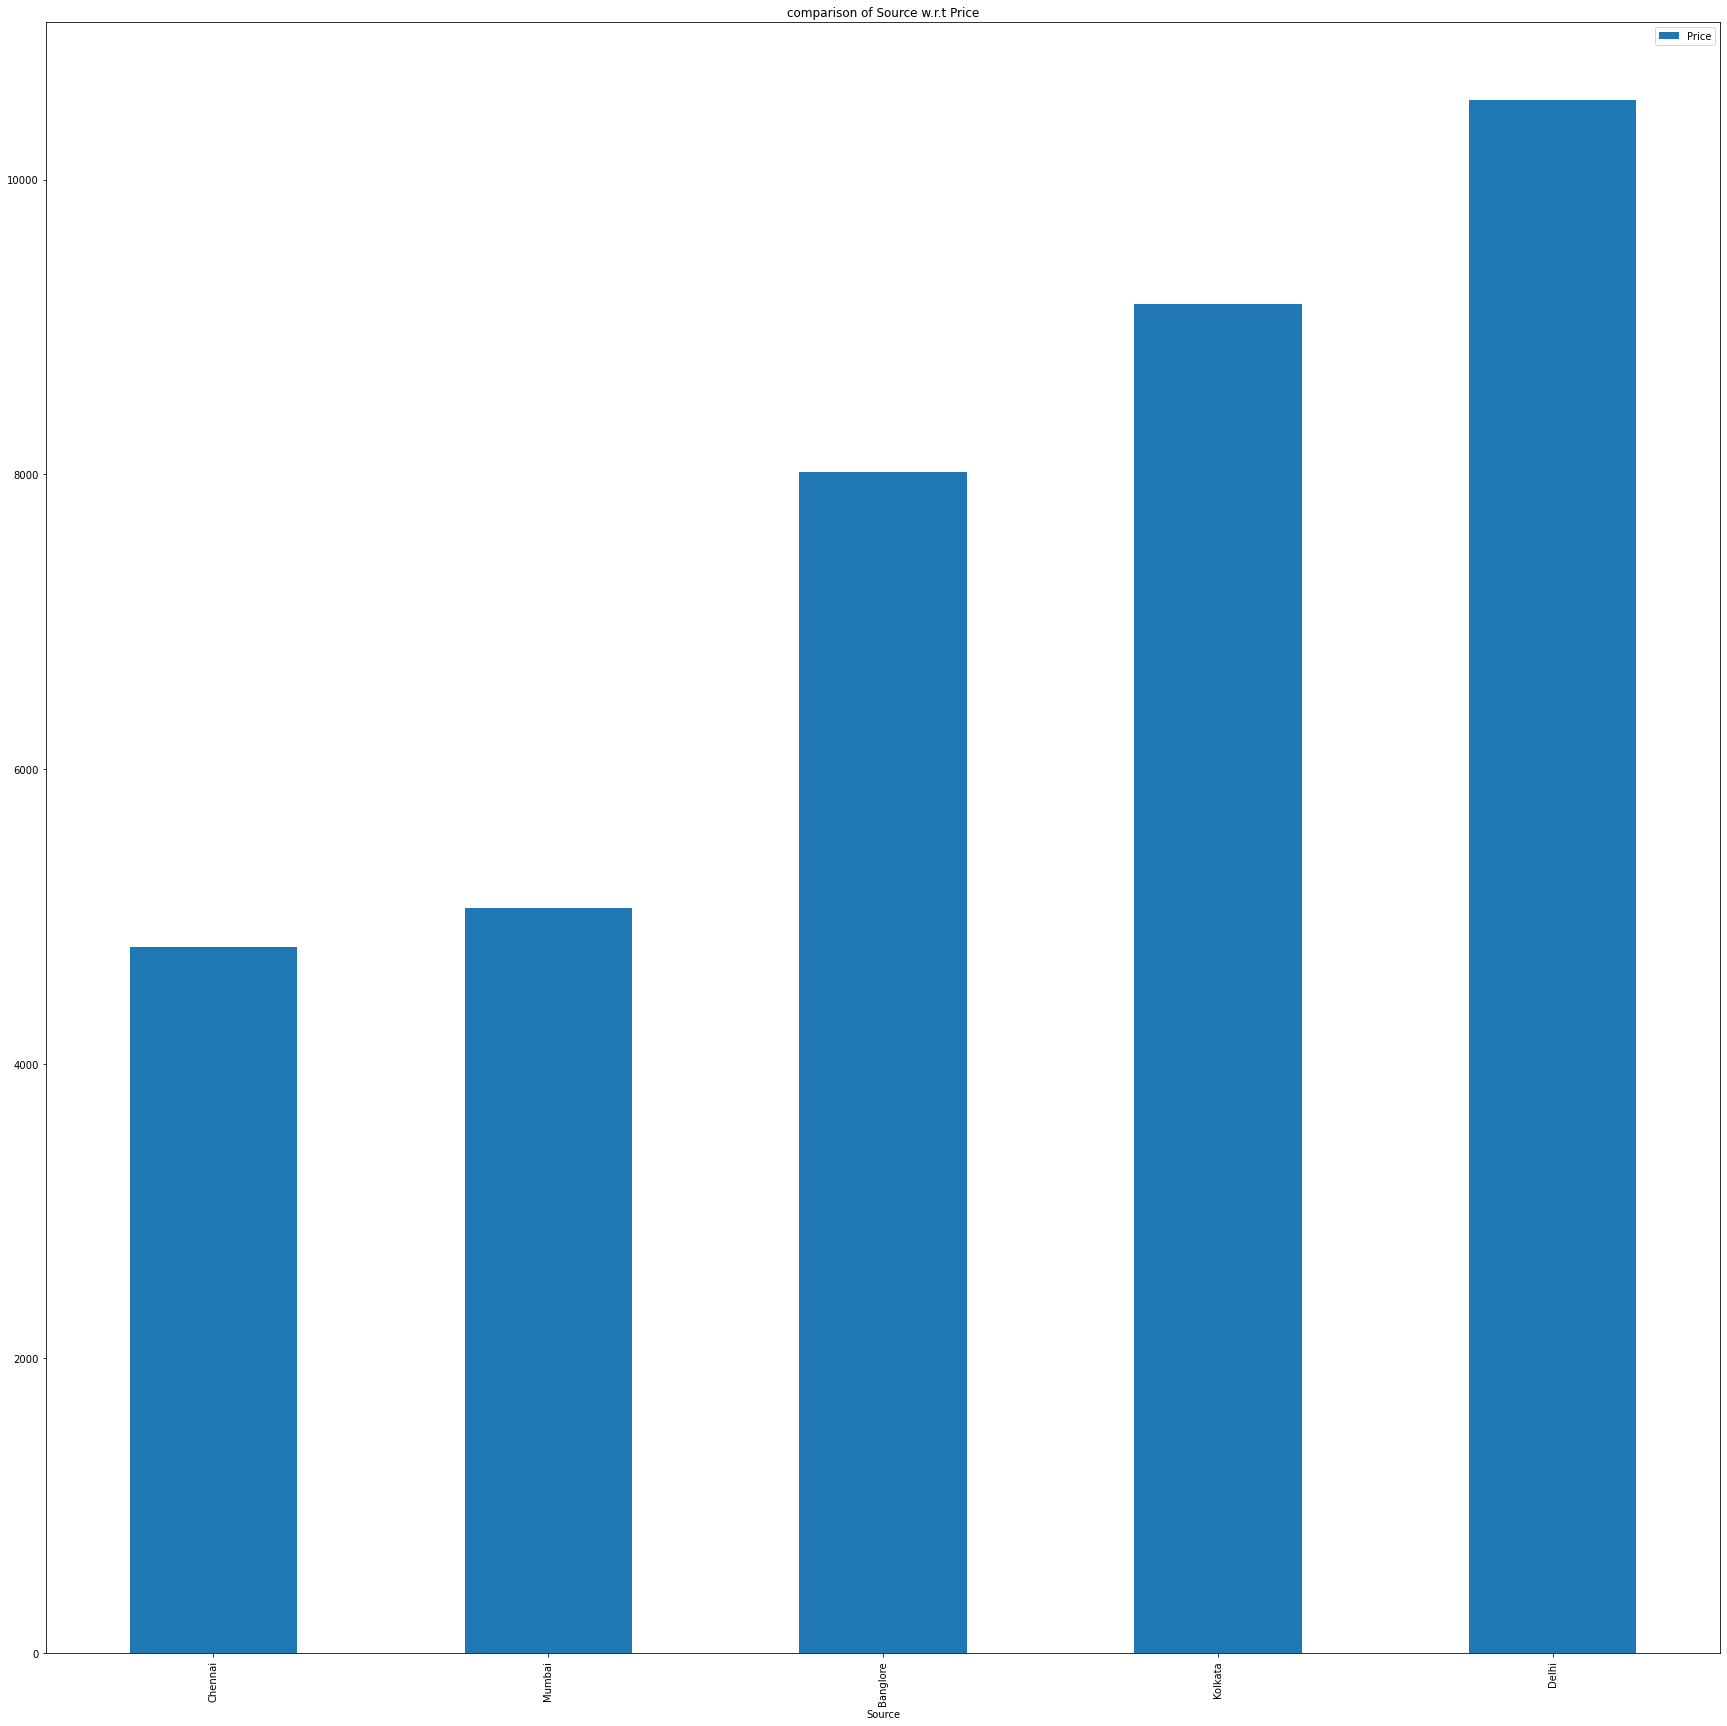

In [809]:
visualize_categorical('Source','Price')

In [810]:
#Flights from Delhi,kolkata,Banglore are highly priced and its most used one.

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


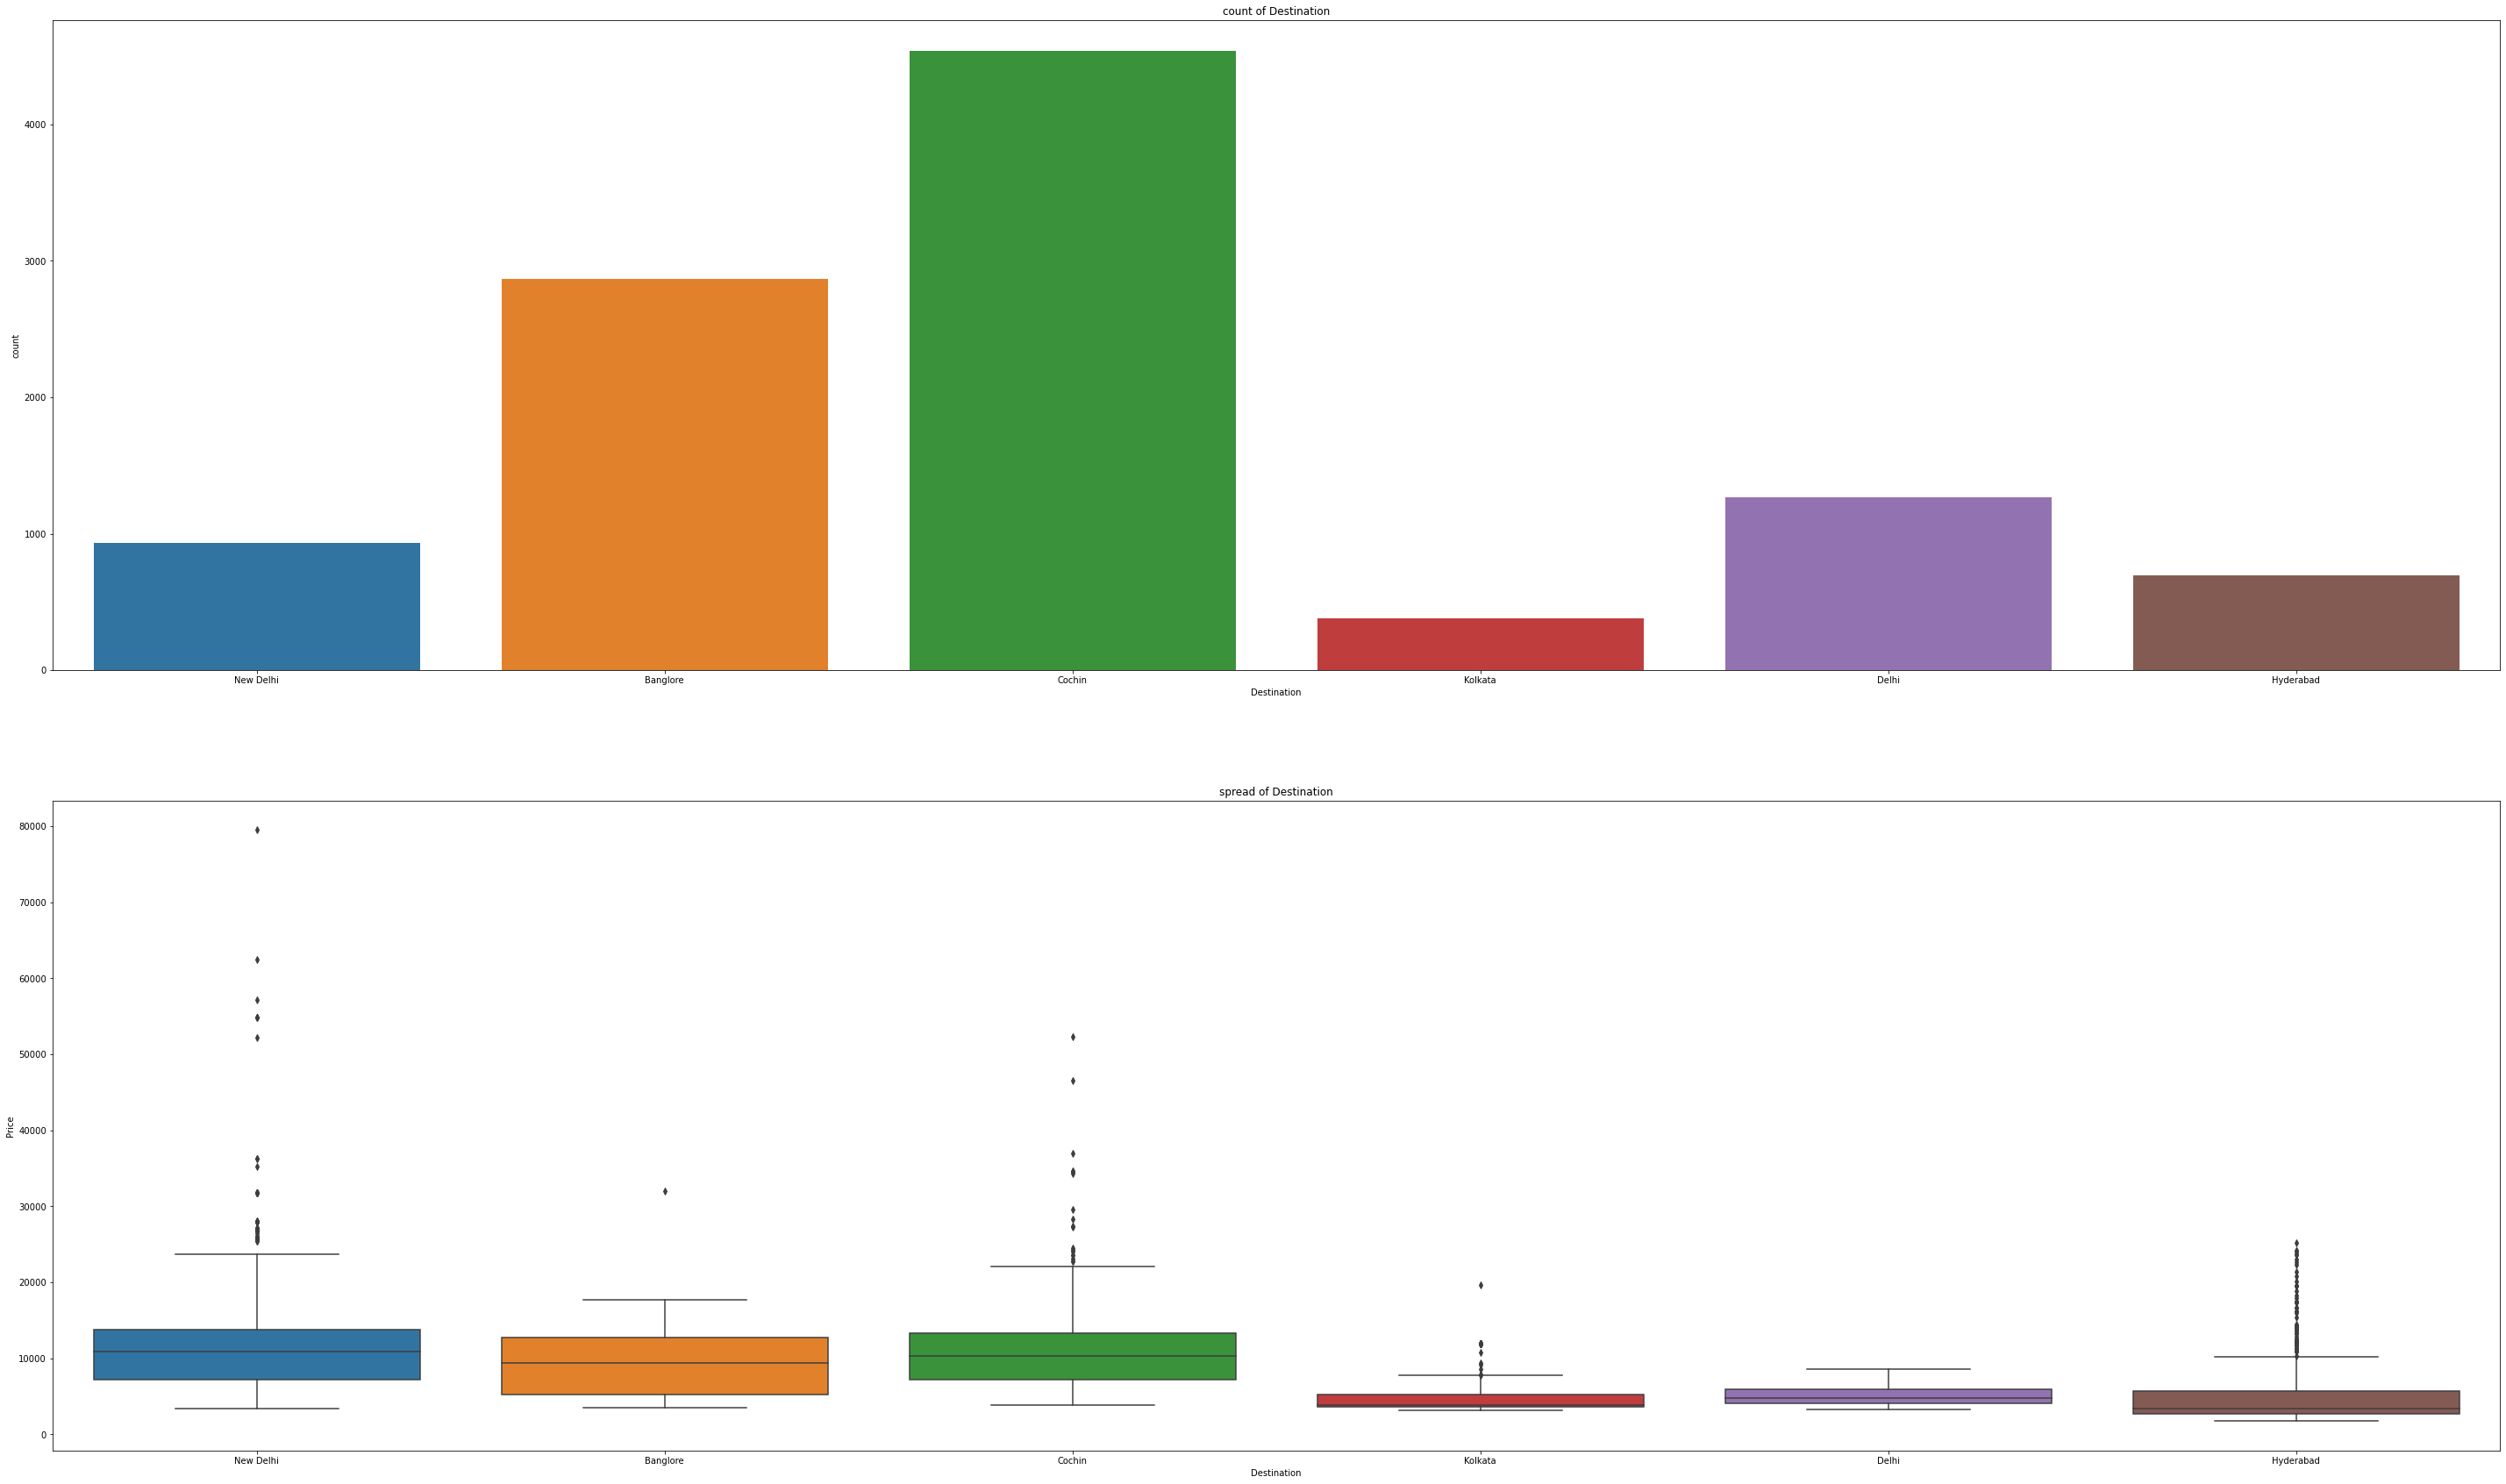

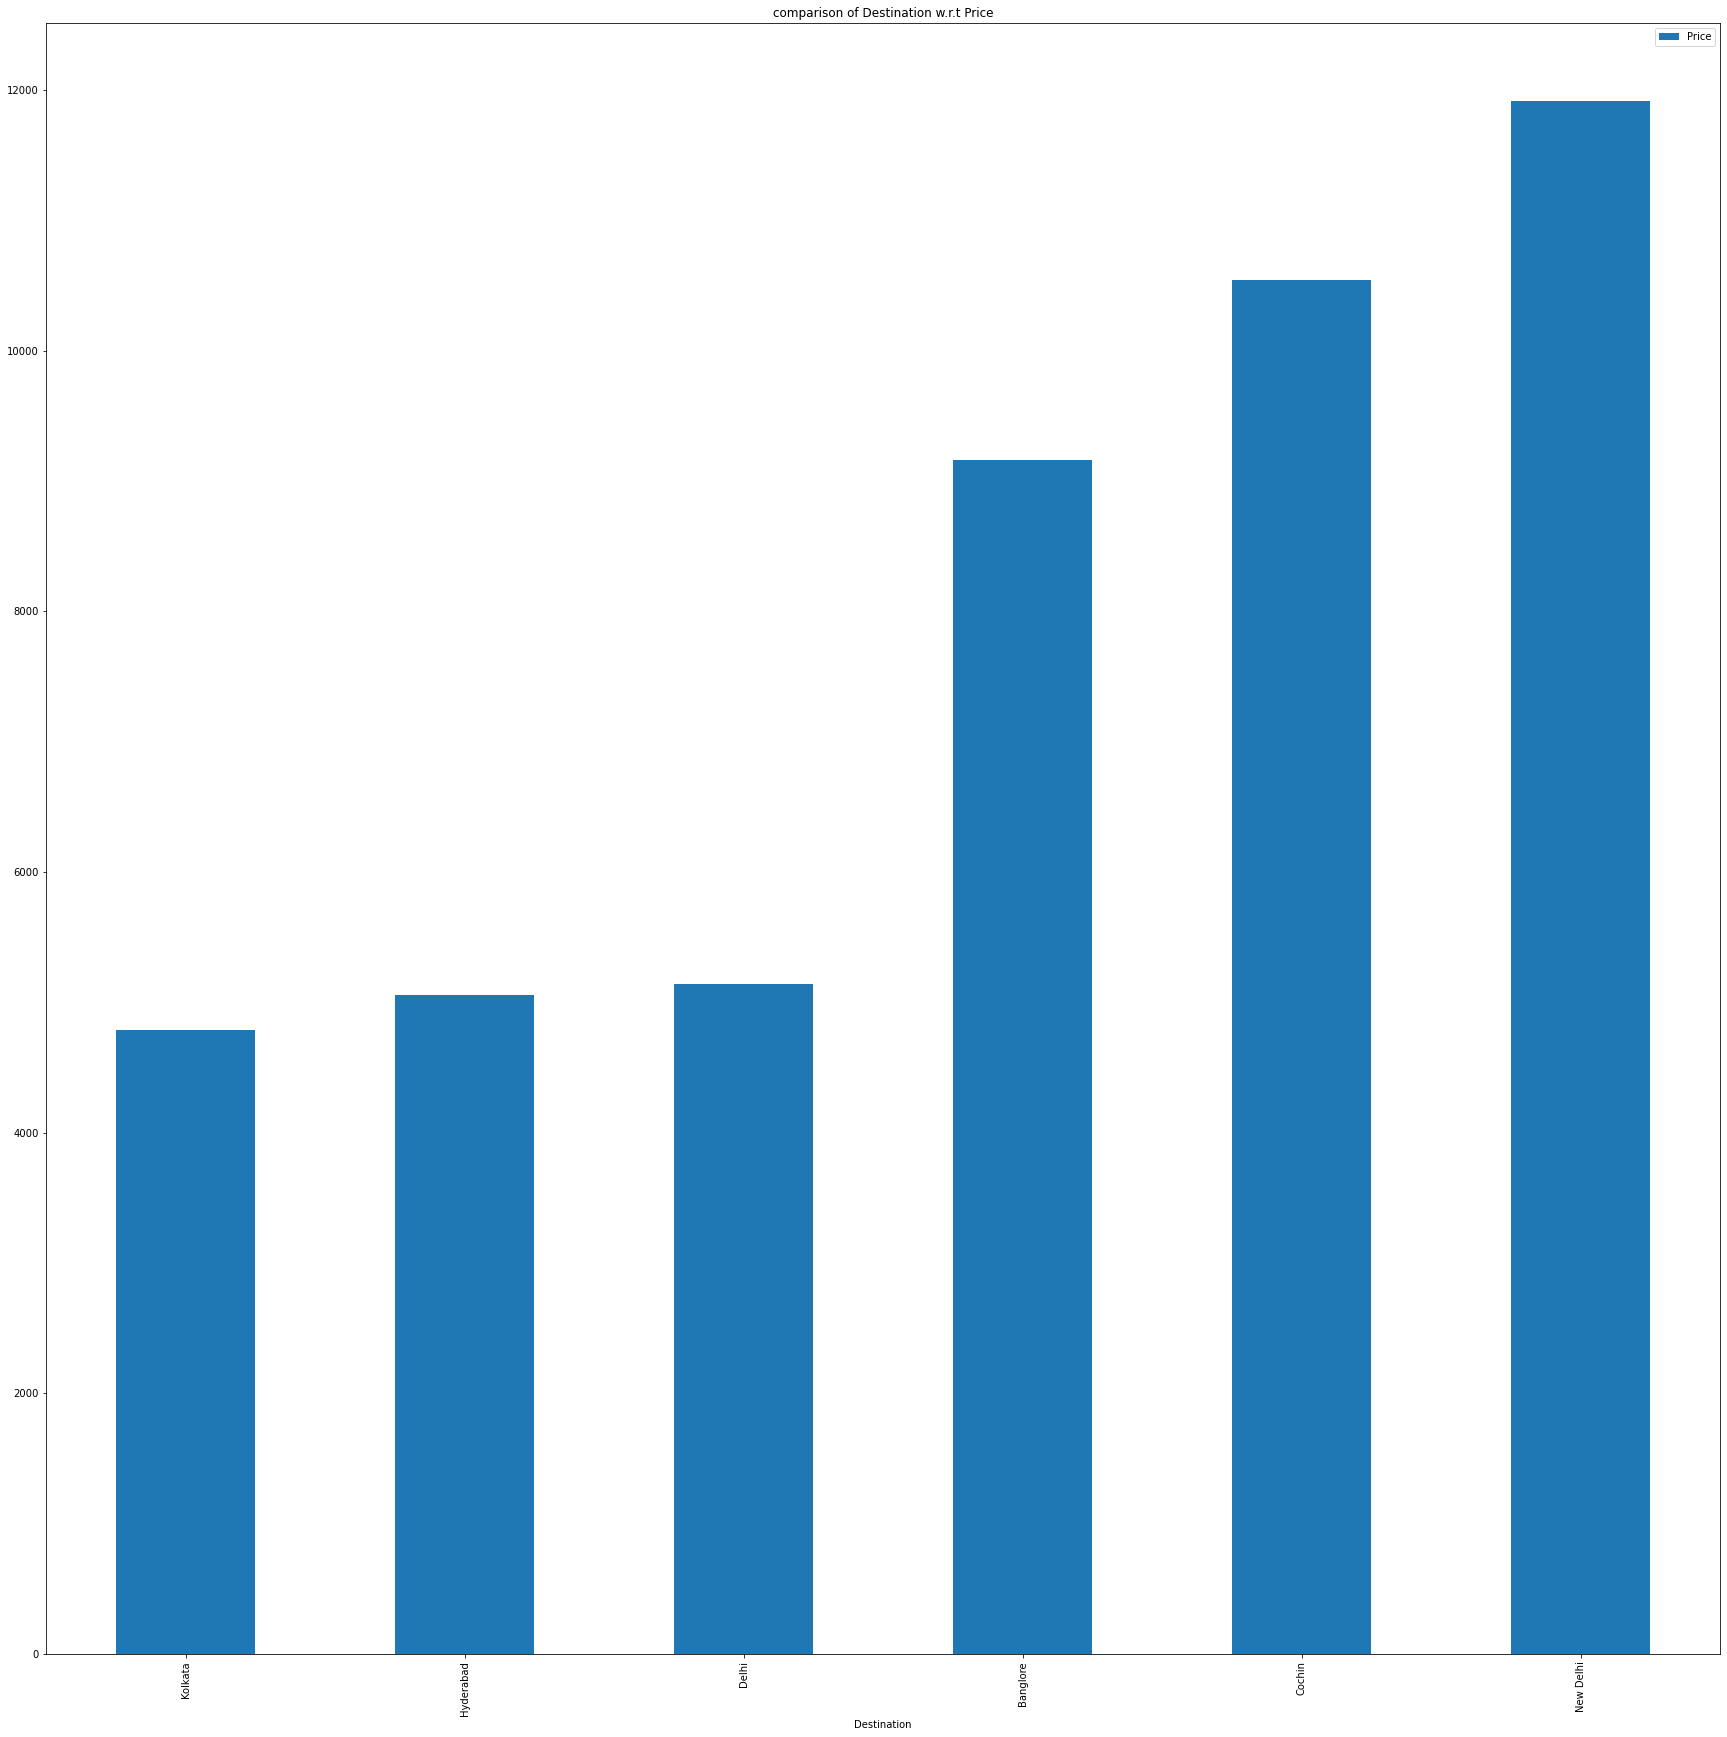

In [811]:
visualize_categorical('Destination','Price')

In [812]:
#Flights to Cochin are highly priced and mostly used one 

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


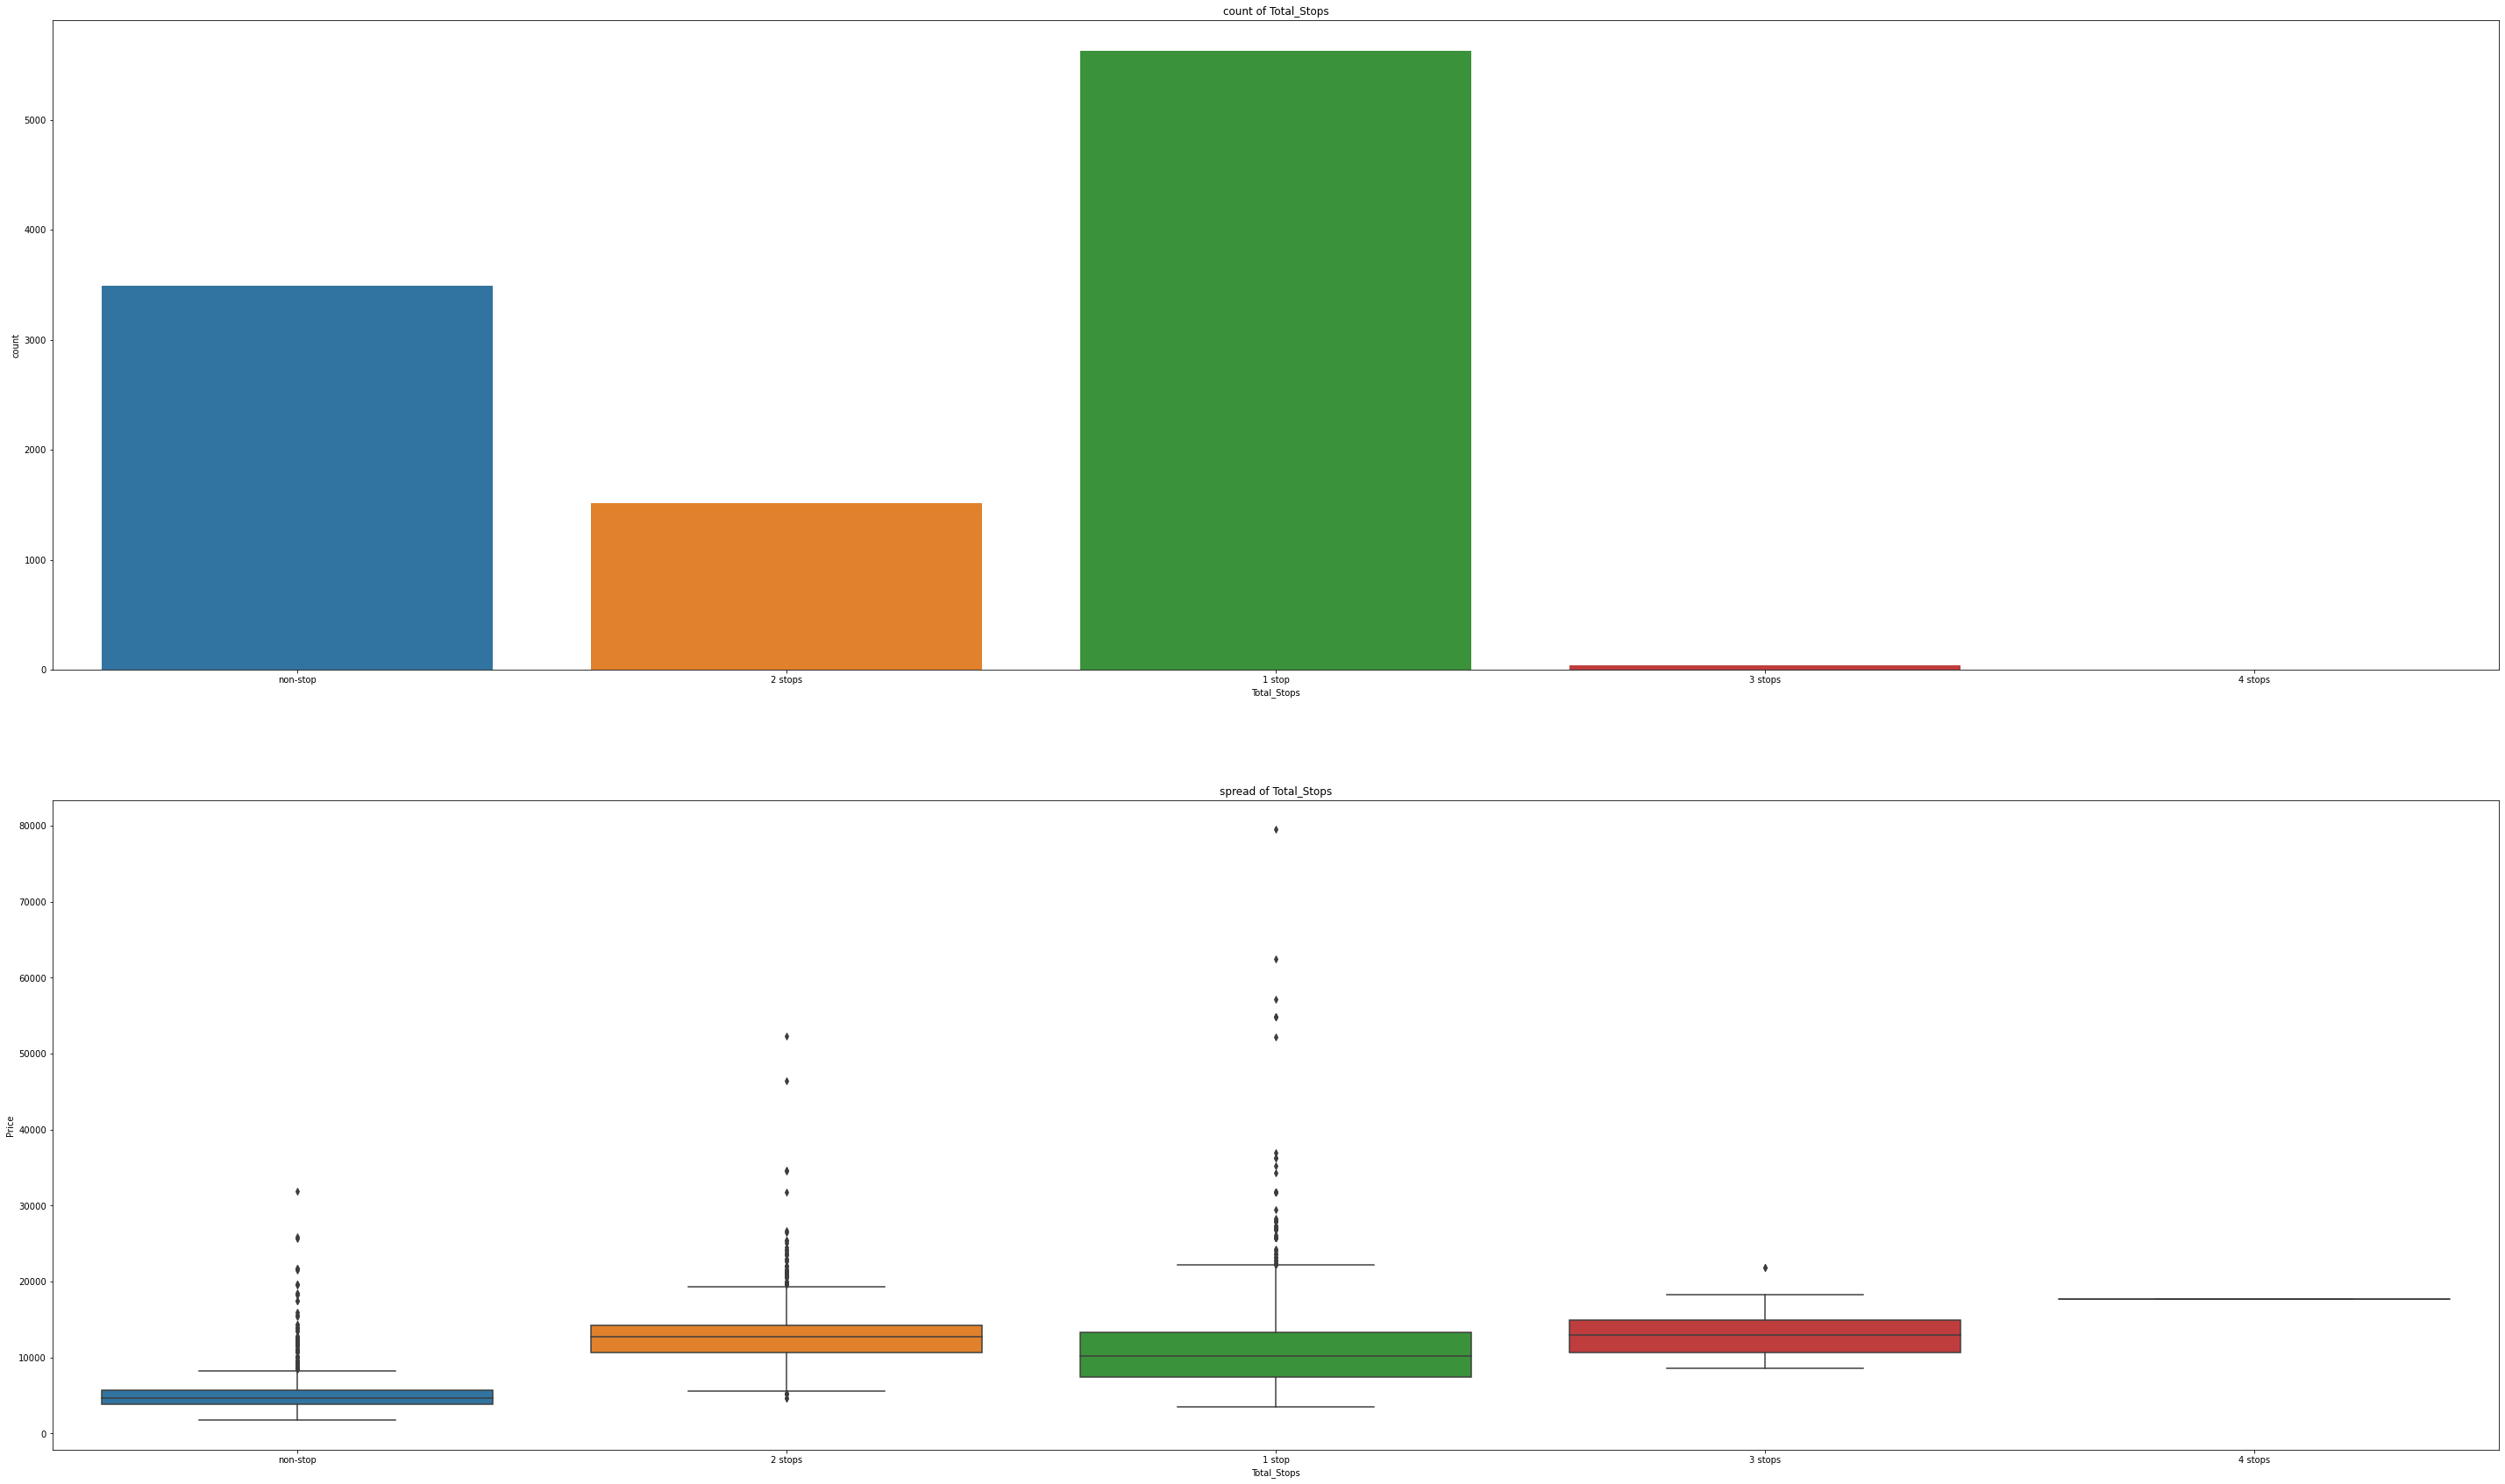

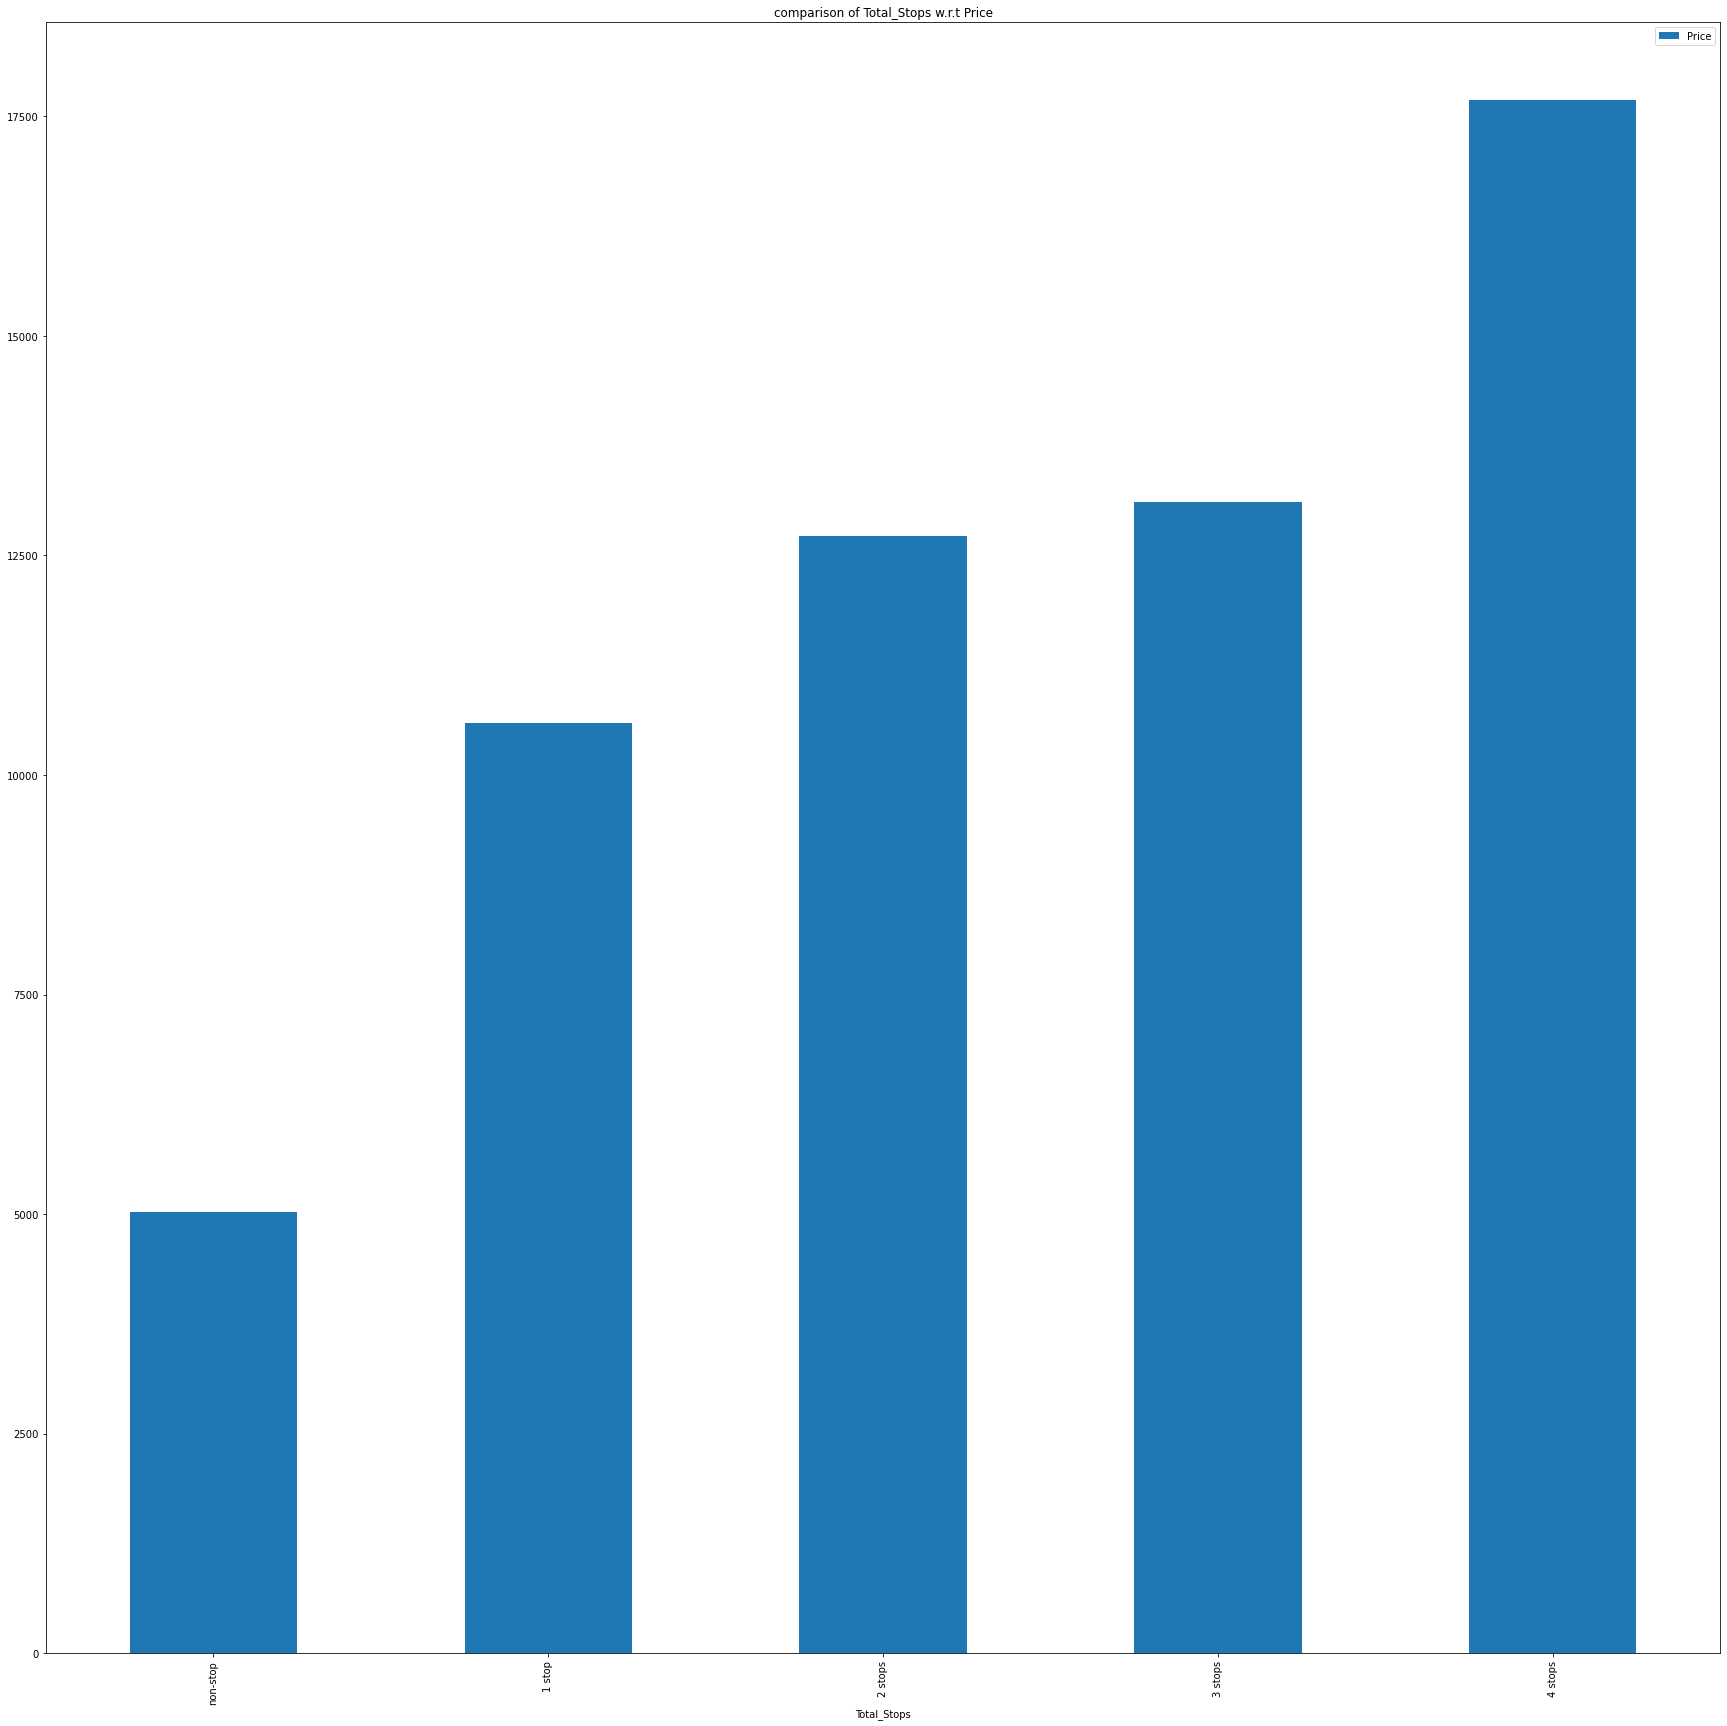

In [813]:
visualize_categorical('Total_Stops','Price')

In [814]:
#Inference: Non-stop flights are 1stops are most favoured and average price of non-stop and 1st stop is also lesser.

In [815]:
#Deriving new feature:

train_data['Duration_hours']=df_train['Duration_hour']

train_data['Duration_mins']=df_train['Duration_mins']

In [816]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7,25


In [817]:
train_data.dropna(inplace=True)

In [818]:
train_data['Duration_hours']=train_data['Duration_hours'].astype('int')
train_data['Duration_hours']=train_data['Duration_hours']*60
train_data['Duration_mins']=train_data['Duration_mins'].astype('int')

In [819]:
train_data['Total_duration']=train_data['Duration_hours']+train_data['Duration_mins']

In [820]:
train_data['Total_Stops']=df_train['Total_Stops']

In [821]:
train_data['Total_Stops'].value_counts()

1    5625
0    3491
2    1519
3      45
4       1
Name: Total_Stops, dtype: int64

In [822]:
#Visualize duration with price and Total stops

def total_duration(x,y):
    train_data_x=train_data[train_data['Total_Stops']==x]
    train_data_y=train_data[train_data['Total_Stops']==y]
    plt.figure(figsize=(20,20))

    sns.scatterplot(x=train_data_x['Total_duration'],y=train_data_x['Price'],s=100,marker="*",color="blue",label=x)
    sns.scatterplot(x=train_data_y['Total_duration'],y=train_data_y['Price'],s=70,marker="+",color="red",label=y)
    plt.title("comparison of price w.r.t total duration")
    
    plt.show()

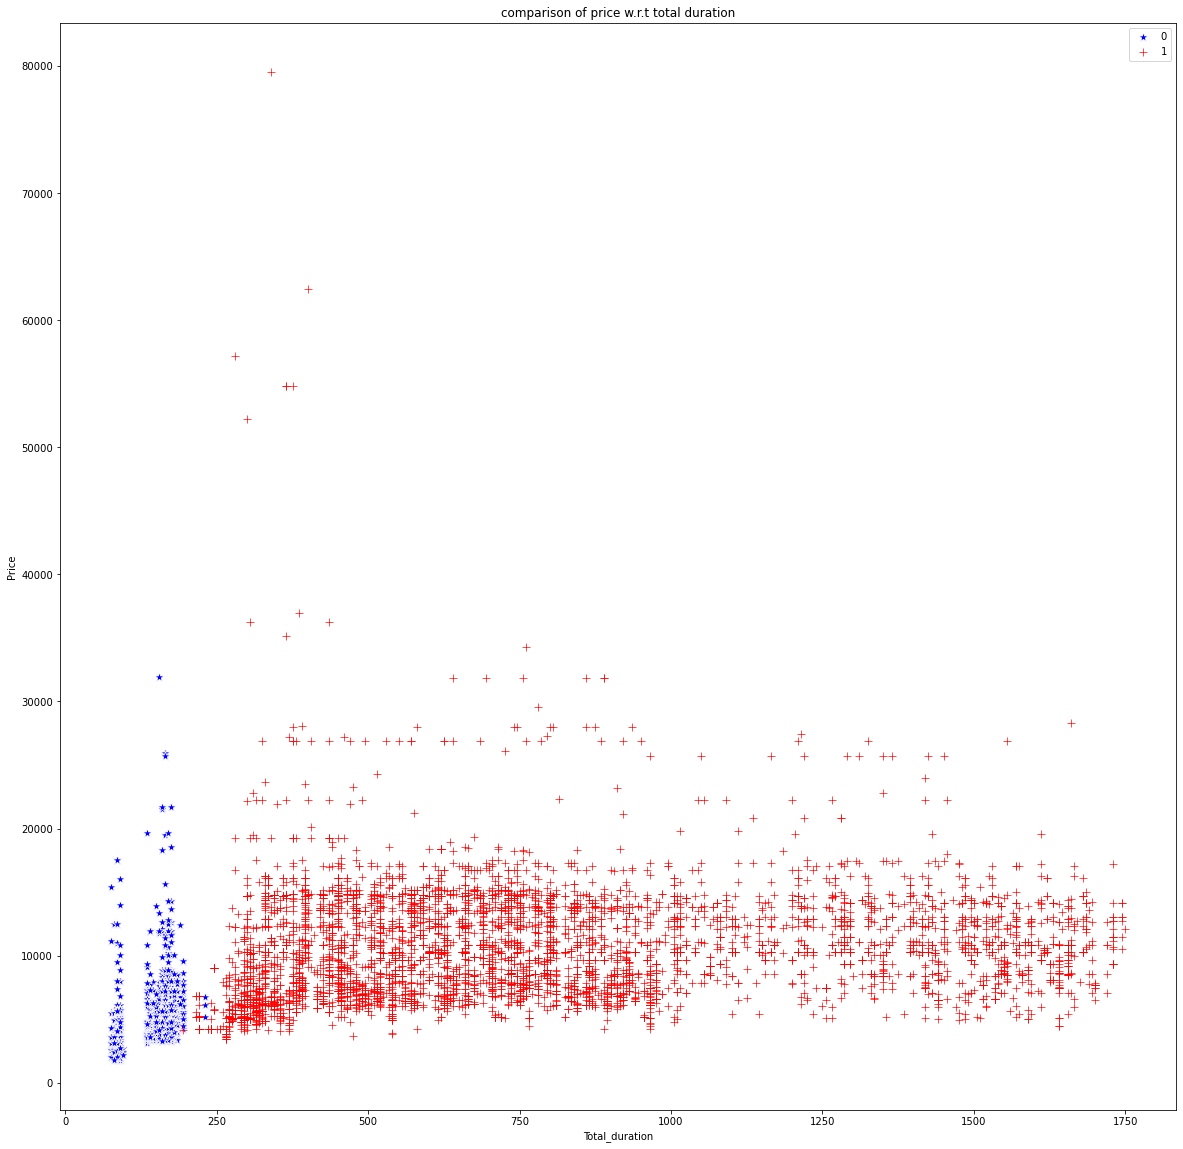

In [823]:
total_duration("0","1")

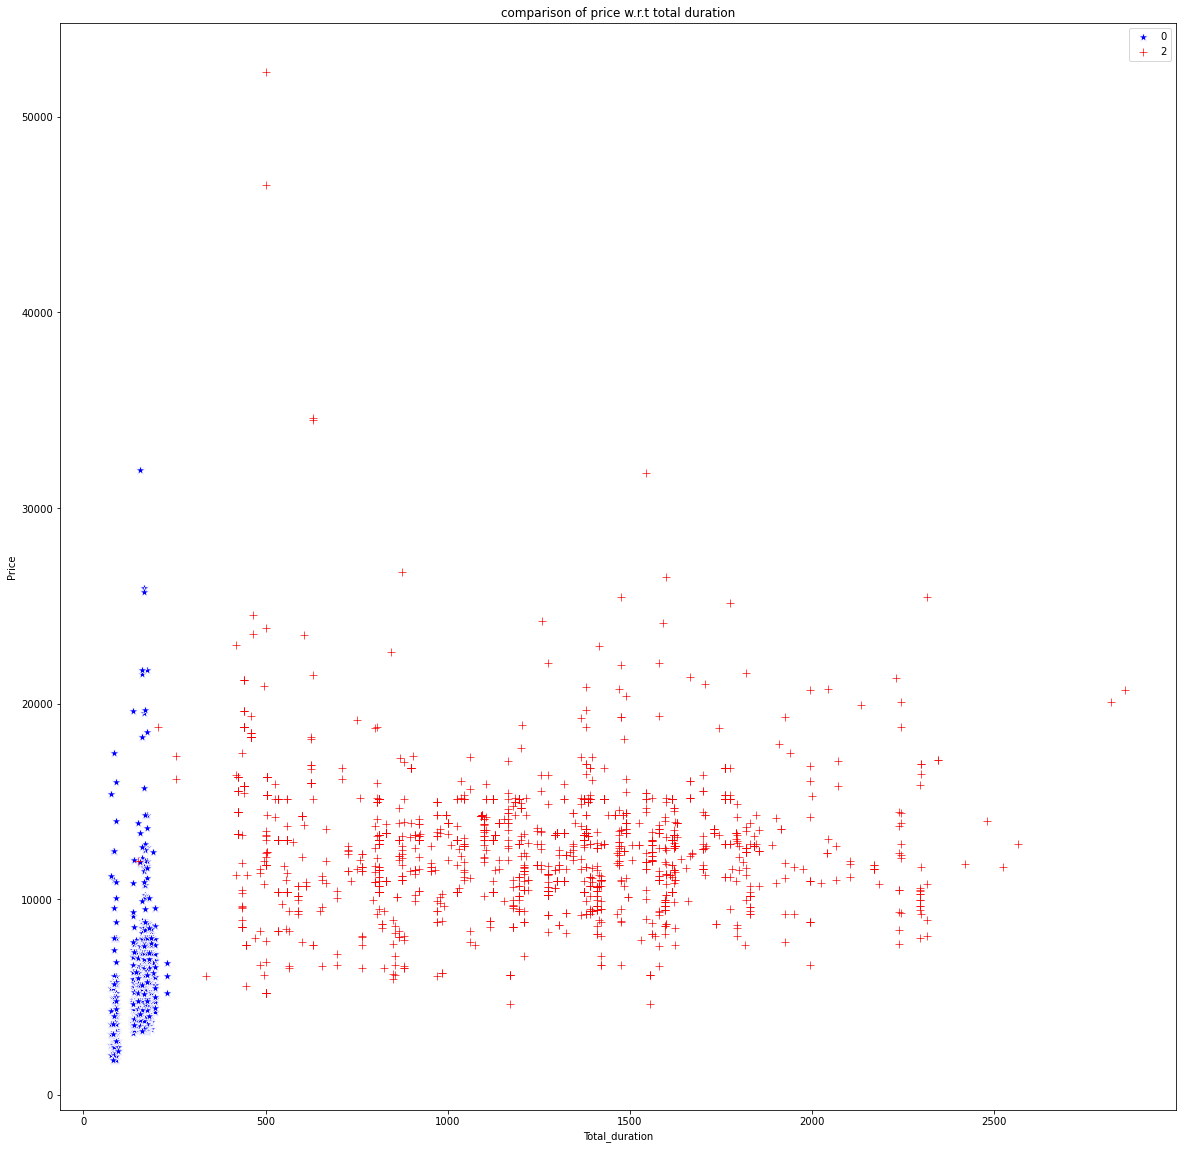

In [824]:
total_duration("0","2")

In [825]:
#Inference : for Total_stop "0" total duration does not increase with price and it is not quite linear with price and also total stop "2" for different number of durations and total stops price doesnt vary much.

In [826]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Total_Stops                                10681 non-null  object
 1   Price                                      10681 non-null  int64 
 2   Arrival_hour                               10681 non-null  int64 
 3   Arrival_min                                10681 non-null  int64 
 4   Dep_hr                                     10681 non-null  int64 
 5   Dep_min                                    10681 non-null  int64 
 6   Journey_date                               10681 non-null  int64 
 7   Journey_month                              10681 non-null  int64 
 8   Duration_hour                              10681 non-null  object
 9   Duration_mins                              10681 non-null  object
 10  Airline_Air Asia                  

In [827]:
df_train['Total_Stops']=df_train['Total_Stops'].astype('int')

In [828]:
df_train['Duration_hour']=df_train['Duration_hour'].astype('int')

In [829]:
df_train['Duration_mins']=df_train['Duration_mins'].astype('int')

# Feature Engineering:

1.HeatMap:
2.Feature Importance:

<AxesSubplot:>

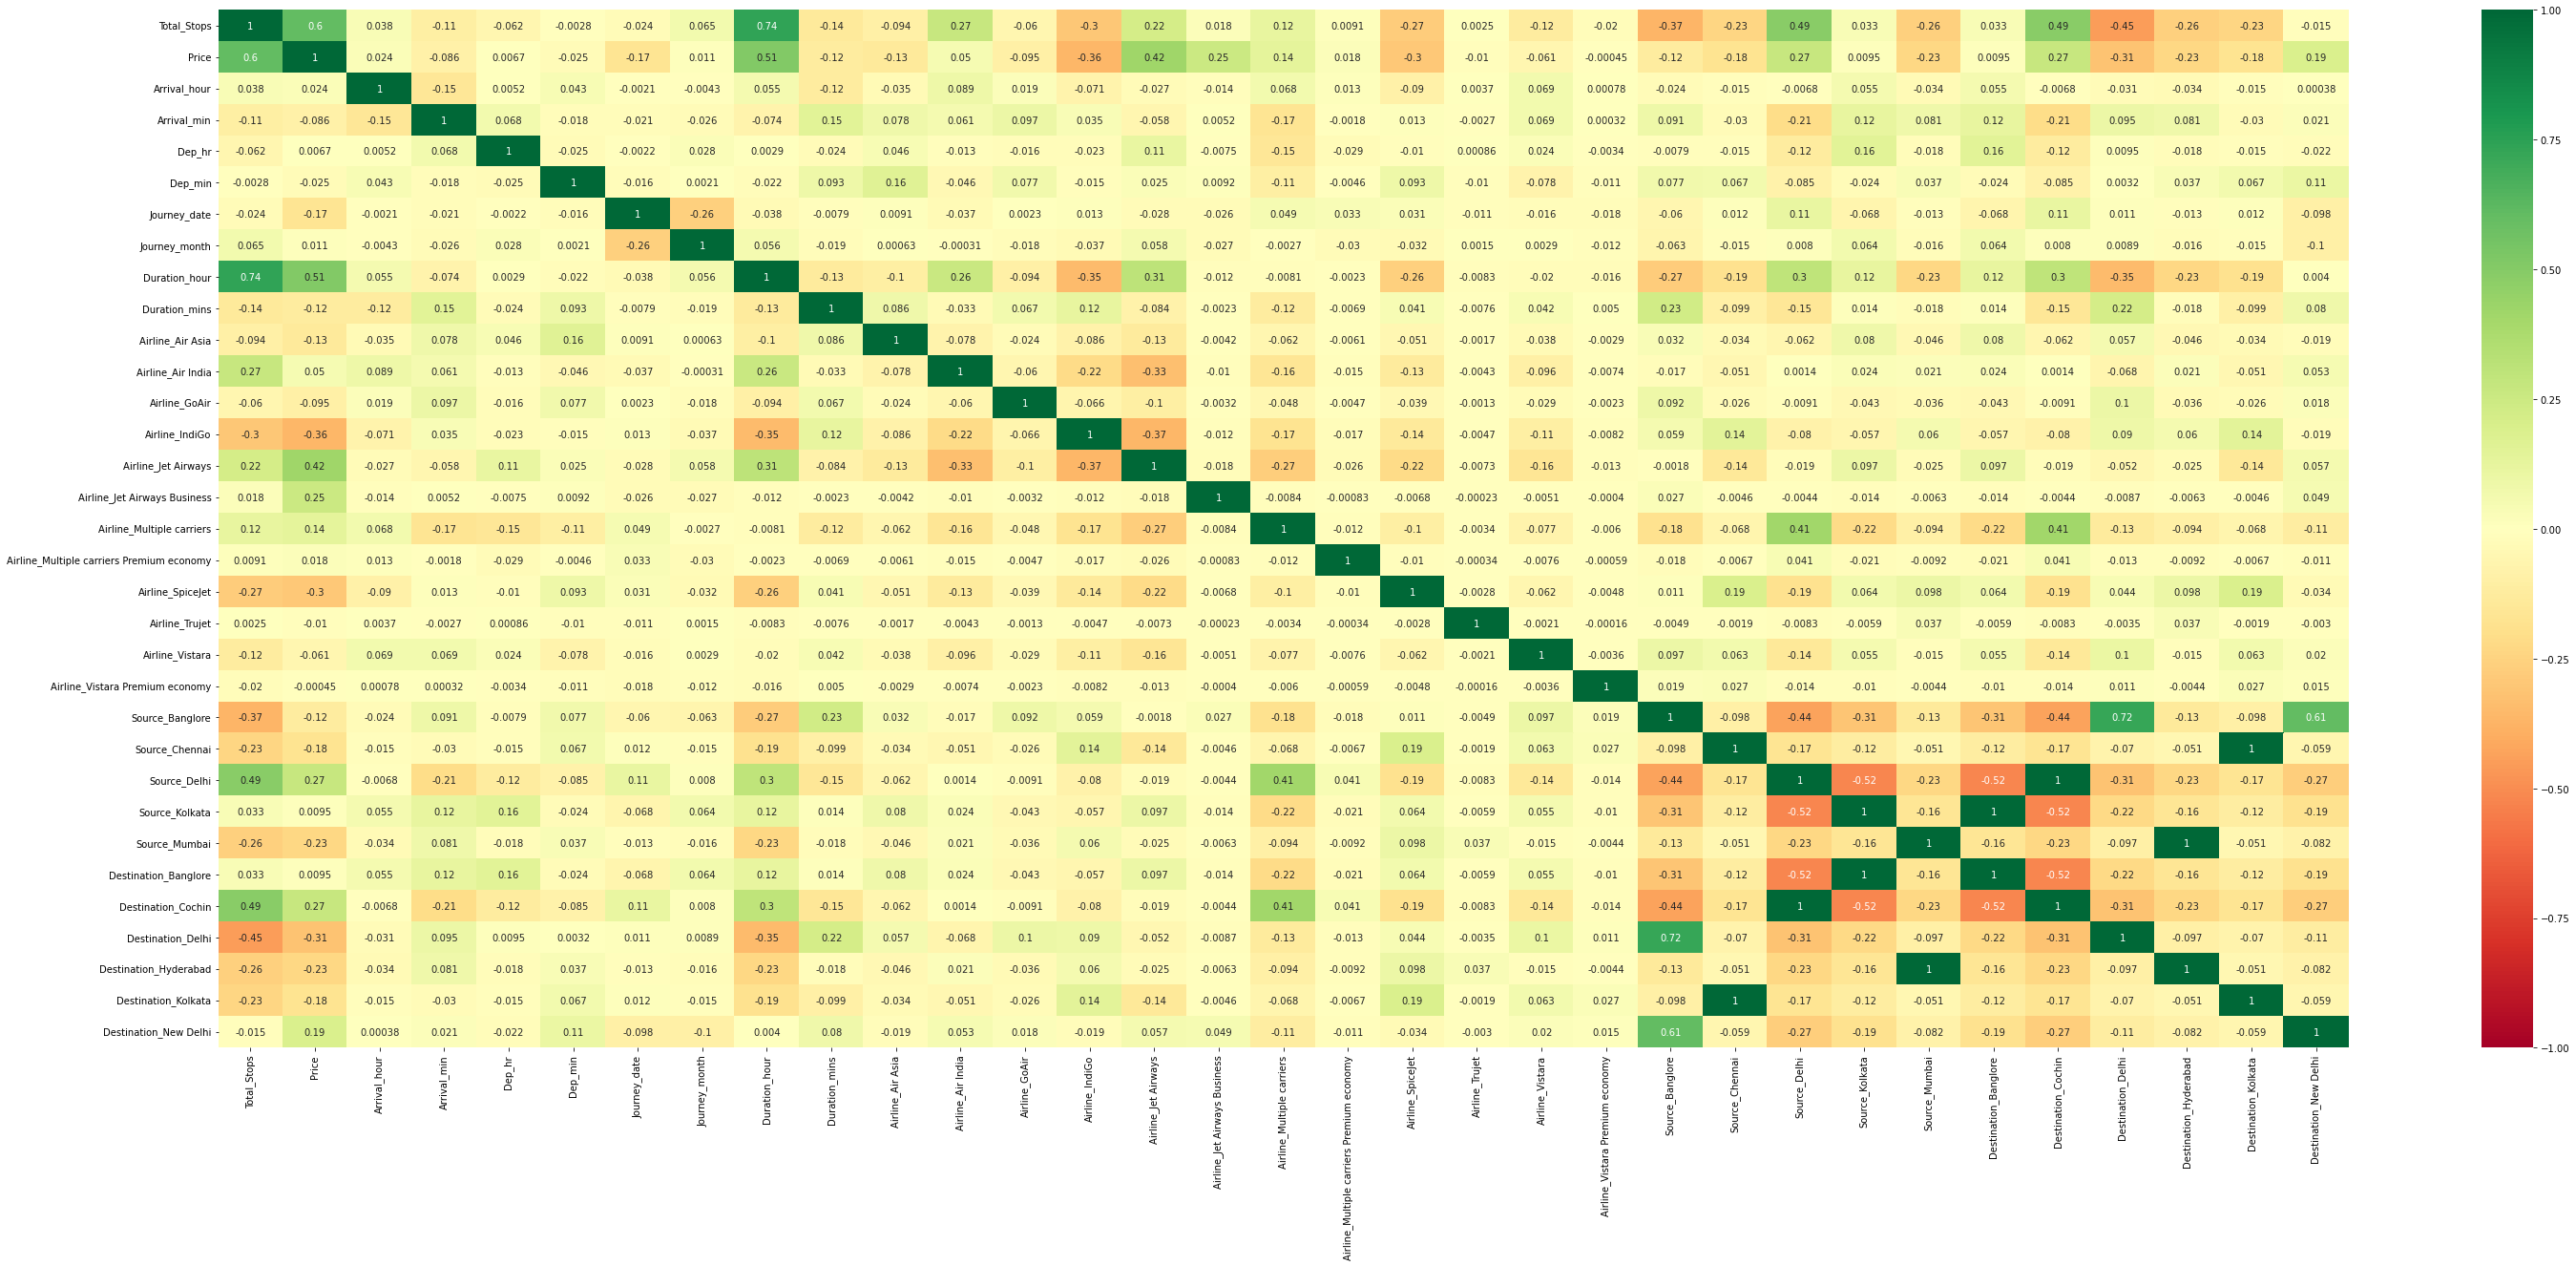

In [830]:
plt.figure(figsize=(50,20))

sns.heatmap(df_train.corr(),vmin=-1,vmax=1,annot=True,cmap='RdYlGn')

In [831]:
#Total stop has better co-relation with price

In [832]:
X=df_train

In [833]:
X=X.drop(columns='Price',axis=1)

In [834]:
Y=df_train['Price']

In [835]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

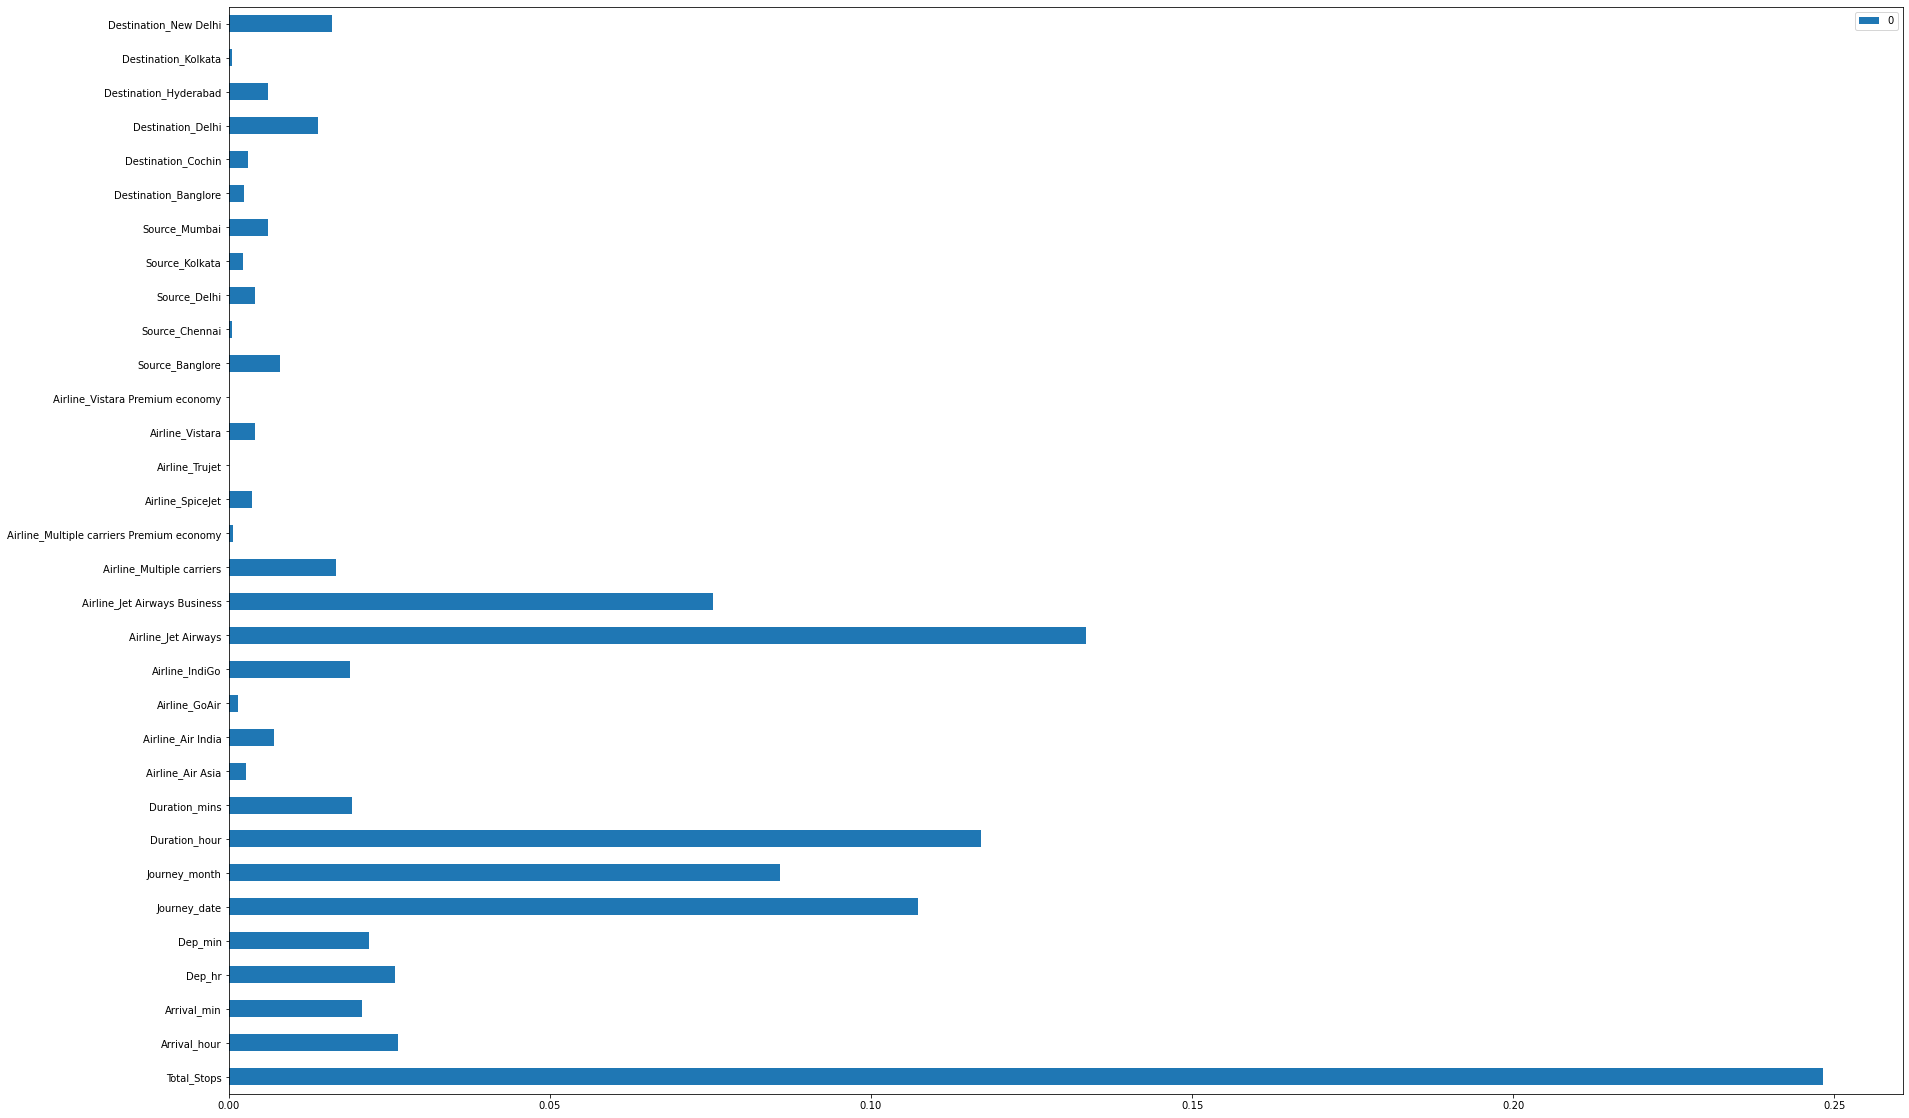

In [836]:
from sklearn.ensemble import ExtraTreesRegressor

ext=ExtraTreesRegressor()

ext.fit(Xtrain,Ytrain)

feature_imp=pd.DataFrame(ext.feature_importances_,index=X.columns)
feature_imp.plot(kind='barh',figsize=(30,20))
plt.show()

In [837]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Model Building:

In [838]:
cv=[]
train_MAE=[]
train_RMSE=[]
train_R2_score=[]


test_MAE=[]
test_RMSE=[]
test_R2_score=[]


def model_building(model):
    
    model.fit(Xtrain,Ytrain)
    
    Y_training_pred=model.predict(Xtrain)
    train_rmse=np.sqrt(mean_squared_error(Ytrain,Y_training_pred))
    train_RMSE.append(train_rmse)
    train_mae=mean_absolute_error(Ytrain,Y_training_pred)
    train_MAE.append(train_mae)
    r2=r2_score(Ytrain,Y_training_pred)
    train_R2_score.append(r2)
    
    
    Y_test_pred=model.predict(Xtest)
    rmse=np.sqrt(mean_squared_error(Ytest,Y_test_pred))
    test_RMSE.append(rmse)
    mae=mean_absolute_error(Ytest,Y_test_pred)
    test_MAE.append(mae)
    test_r2=r2_score(Ytest,Y_test_pred)
    test_R2_score.append(test_r2)
    
    cv_score=cross_val_score(model,Xtrain,Ytrain,cv=5)
    cv_score_mean=cv_score.mean()
    cv.append(cv_score_mean)    
    

In [839]:
lr=LinearRegression()

model_building(lr)

In [840]:
ls=Lasso()

alpha=np.logspace(-3,3,14)

ls_rs=RandomizedSearchCV(estimator=ls,param_distributions=dict(alpha=alpha))

model_building(ls_rs)

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138361275.8693161, tolerance: 14182277.955786832
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91052770.64355469, tolerance: 14211686.880920831
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21571841.537773132, tolerance: 14211686.880920831
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did 

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60693122.658706665, tolerance: 11651747.923526611
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1993235579.0454445, tolerance: 11504916.373249946
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955962160.1157303, tolerance: 11712830.546001242
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective di

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2101684281.9695015, tolerance: 11441955.403036777
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2017780926.50589, tolerance: 11036358.155890418
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449493304.67840576, tolerance: 11636142.138778714
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did 

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 718374506.8271179, tolerance: 11529915.18722897
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695666700.5695343, tolerance: 11771693.63655514
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3504577176.631836, tolerance: 12201397.377523776
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15040358.541046143, tolerance: 11161554.303432839
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21369526.890815735, tolerance: 11543061.445076505
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25241484.959205627, tolerance: 11733393.962976303
  positive)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective di

In [841]:
rg=Ridge()

rg_rs=RandomizedSearchCV(estimator=rg,param_distributions=dict(alpha=alpha))

model_building(rg_rs)

In [842]:
rfr=RandomForestRegressor()

n_estimators=list(range(100,200,500))

min_samples_split=list(range(3,6,9))

max_depth=list(range(5,10,15))

min_samples_leaf=[1,3,5,7]

max_features=['auto','sqrt']

param_distributions={"n_estimators":n_estimators,
                    "min_samples_split":min_samples_split,
                    "max_depth":max_depth,
                    "min_samples_leaf":min_samples_leaf,
                    "max_features":max_features}

rzc=RandomizedSearchCV(estimator=rfr,param_distributions=param_distributions)

model_building(rzc)

C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\a0g0btd\Anaconda3\envs\flightpred\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total 

In [843]:
gbr=GradientBoostingRegressor()

learning_rate=[0.0001,0.001,0.1]

n_estimators=list(range(100,200,500))

min_samples_split=list(range(3,6,9))

max_depth=list(range(5,10,15))

min_samples_leaf=[1,3,5,7]

max_features=['auto','sqrt']

param_distributions={"learning_rate":learning_rate,
                    "n_estimators":n_estimators,
                    "min_samples_split":min_samples_split,
                    "max_depth":max_depth,
                    "min_samples_leaf":min_samples_leaf,
                    "max_features":max_features}

gb_rc=RandomizedSearchCV(estimator=gbr,param_distributions=param_distributions)

model_building(gb_rc)

In [844]:
results=pd.DataFrame([cv,train_MAE,train_RMSE,train_R2_score,test_MAE,test_RMSE,test_R2_score],columns=['Linear_Regression','Lasso','Ridge','RandomForestRegressor','GradientBoosting'],index=['cv','train_MAE','train_RMSE','train_R2_score','test_MAE','test_RMSE','test_R2_score'])

In [845]:
results

,Linear_Regression,Lasso,Ridge,RandomForestRegressor,GradientBoosting
cv,0.619483,0.619750,0.619467,0.713475,0.795865
train_MAE,1960.990482,1961.039556,1960.992224,1622.888300,1211.673707
train_RMSE,2818.167691,2818.181362,2818.167700,2278.808770,1725.567516
train_R2_score,0.624953,0.624949,0.624953,0.754773,0.859390
test_MAE,2048.268738,2048.261392,2048.266349,1722.274509,1337.920605
test_RMSE,2976.003272,2975.779215,2975.982818,2523.861090,2019.799949
test_R2_score,0.589536,0.589598,0.589541,0.704784,0.810929


In [846]:
import pickle

with open("Gradient_boosting.pkl","wb") as f:
    pickle.dump(gb_rc,f)
    

In [880]:
test_data=pd.read_excel("Test_set.xlsx",engine="openpyxl")

In [881]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [882]:
test_data.drop(columns=['Route','Additional_Info'],axis=1,inplace=True)

In [883]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Arrival_Time     2671 non-null   object
 6   Duration         2671 non-null   object
 7   Total_Stops      2671 non-null   object
dtypes: object(8)
memory usage: 167.1+ KB


In [884]:
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
dtype: int64

In [885]:
df_train.columns

Index(['Total_Stops', 'Price', 'Arrival_hour', 'Arrival_min', 'Dep_hr',
       'Dep_min', 'Journey_date', 'Journey_month', 'Duration_hour',
       'Duration_mins', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [886]:
test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour

In [887]:
test_data['Arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [888]:
test_data['Dep_hr']=pd.to_datetime(test_data['Dep_Time']).dt.hour

In [889]:
test_data['Dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute

In [890]:
test_data['Journey_date']=pd.to_datetime(test_data['Date_of_Journey']).dt.day

In [891]:
test_data['Journey_month']=pd.to_datetime(test_data['Date_of_Journey']).dt.month

In [892]:
test_data['Duration_hour']=test_data['Duration'].str.split(" ").str[0].str.split("h").str[0]

In [893]:
test_data['Duration_mins']=test_data['Duration'].str.split(" ").str[1].str.split("m").str[0]

In [894]:
test_data['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [895]:
test_data['Total_Stops']=test_data['Total_Stops'].replace({"1 stop":"1","non-stop":"0","2 stops":"2","3 stops":"3","4 stops":"4"})

In [896]:
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Arrival_hour,Arrival_min,Dep_hr,Dep_min,Journey_date,Journey_month,Duration_hour,Duration_mins
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1,4,25,17,30,6,6,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1,10,20,6,20,5,12,4,NaN


In [897]:
test_Airlines=test_data[['Airline']]

test_Airlines=pd.get_dummies(test_Airlines,drop_first=False)

In [898]:
test_Airlines

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,0
2667,0,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,0,1,0,0,0,0,0,0
2669,0,1,0,0,0,0,0,0,0,0,0


In [899]:
test_Source=test_data[['Source']]

test_Source=pd.get_dummies(test_Source,drop_first=False)

In [900]:
test_Source

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2666,0,0,0,1,0
2667,0,0,0,1,0
2668,0,0,1,0,0
2669,0,0,1,0,0


In [901]:
test_Destination=test_data[['Destination']]

test_Destination=pd.get_dummies(test_Destination,drop_first=False)

In [902]:
test_Destination

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
2666,1,0,0,0,0,0
2667,1,0,0,0,0,0
2668,0,1,0,0,0,0
2669,0,1,0,0,0,0


In [903]:
test_data=pd.concat([test_data,test_Airlines,test_Source,test_Destination],axis=1)

In [904]:
test_data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Arrival_hour,Arrival_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1,4,25,...,0,1,0,0,0,1,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1,10,20,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1,19,0,...,0,1,0,0,0,1,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1,21,0,...,0,1,0,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,0,2,45,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1,20,25,...,0,0,1,0,1,0,0,0,0,0
2667,IndiGo,27/03/2019,Kolkata,Banglore,14:20,16:55,2h 35m,0,16,55,...,0,0,1,0,1,0,0,0,0,0
2668,Jet Airways,6/03/2019,Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1,4,25,...,0,1,0,0,0,1,0,0,0,0
2669,Air India,6/03/2019,Delhi,Cochin,04:00,19:15,15h 15m,1,19,15,...,0,1,0,0,0,1,0,0,0,0


In [905]:
test_data.drop(columns=["Airline","Date_of_Journey","Source","Destination","Dep_Time","Arrival_Time","Duration"],axis=1,inplace=True)

In [915]:
test_data.insert(18, 'Airline_Truejet', '0')

In [916]:
test_data.columns

Index(['Total_Stops', 'Arrival_hour', 'Arrival_min', 'Dep_hr', 'Dep_min',
       'Journey_date', 'Journey_month', 'Duration_hour', 'Duration_mins',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Truejet', 'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [908]:
test_data['Total_Stops']=test_data['Total_Stops'].astype('int')

In [912]:
test_data['Journey_date']=test_data['Journey_date'].astype('int')

In [917]:
test_data['Airline_Trujet']=test_data['Airline_Trujet'].astype('int')

In [929]:
validation=gb_rc.predict(test_data)

In [933]:
validation

array([11941.69745514,  4891.70222479, 12973.84094073, ...,
       16845.95930742, 12541.02185815,  8511.01686747])